## 1. Introduction


In the frame of Sebastian Schaller's PhD project, a large data set of several sedimentological-, geophysical-, and chemical logs (here, logs can be thought of as 'features' in a dataset) were collected from a 252-meter-long drill core. 
The goal is to analyze the data and: 
   - Compare the visual-based classification of the sediments (classic geological route) with a semi-automated data-based clustering of the logs (possibly using a PCA)
   - Another goal would be to develop a log-based way to classify unconsolidated quaternary sediments. This would have several advantages:
       - Core drilling is expensive ~1000 sFr/m
       - Takes a lot of time to analyze and describe -> 1-2 years from drilling to a proper profile
       - A combination of much cheaper destructive drilling with wireline logging would obtain the same logs but without keeping the core intact. This dataset could then be ran through the clustering model to reconstruct the stratigraphy 
       
**Situation:**
In a first step, the three MSCL-Logs (wet bulk density, magnetic susceptibility, natural gamma radiation) are compared since they represent the most complete data set and have a very close measurement spacing of 0.5 cm. Further, they are measured directly at the cores and, therefore, are directly comparable with the visual core description. Thus, the visual-based classification can be compared with the data-based clustering, and the impact of the different logs can be estimated. 

**Data Analysis**

- Data collection
    - MSCL-core-log data (collected during my PhD-studies)
- Description of the data (for each individual log)
    - Distribution of quality and lithology
    - Calculate mean and std
    - Log data is normally distributed, -> no trend in/homogeneous data set (0-hypothesis-1)
        - Test normality of whole distribution (D`Agostino-Pearson-Test)
        - Test normality of individual sub-datasets (lithological groups) (D`Agostino-Pearson-Test)
    - Distribution of the sub-datasets (based on visible core descriptions) is randomly distributed (0-hypothesis-2)
        - Test similarities of litho groups of each log (Kruskal-Wallis test) 
        - pair-wise comparison of each possible combination of the litho groups (Mannä-Whitney-U test)
    - Choose good plots
    
**Conclusions** 
- Distribution of log data:
    - Log data is not normally distributed -> q-q plots and D`Agostino-Pearson-Test
    - Sub-data sets are also not normally distributed -> q-q plots and D`Agostino-Pearson-Test
- Distribution of litho groups inside the whole log data:
    - Is not normally distributed, makes geological sense, shows no overlap -> Kruskal-Wallis test and Mann-Whitney-U test
- Judging similarities between the visual core description-based lithological classification and the scatter plots.
    - clustering is visible, backed by geological knowledge
- Qualitatively judging the value/impact of the analyzed logs on the data clustering -> input for the main project: developing a (geo)physical and chemical borehole/drillcore log-based classification system for unconsolidated quaternary sediments.
    - Qualitatively: Density and Natural gamma log  clearly influence the clustering, whereas magnetic susceptibility does not have much impact on clustering by this type of sediments (heterogeneous, reworked, ...)
    - Possible options for other logs for combination: 
        - Resistivity
        - Porosity


**Definition of significant**

P-values below 0.001 ar considered as  unlikely enough to reject the 0-hypothesis. 


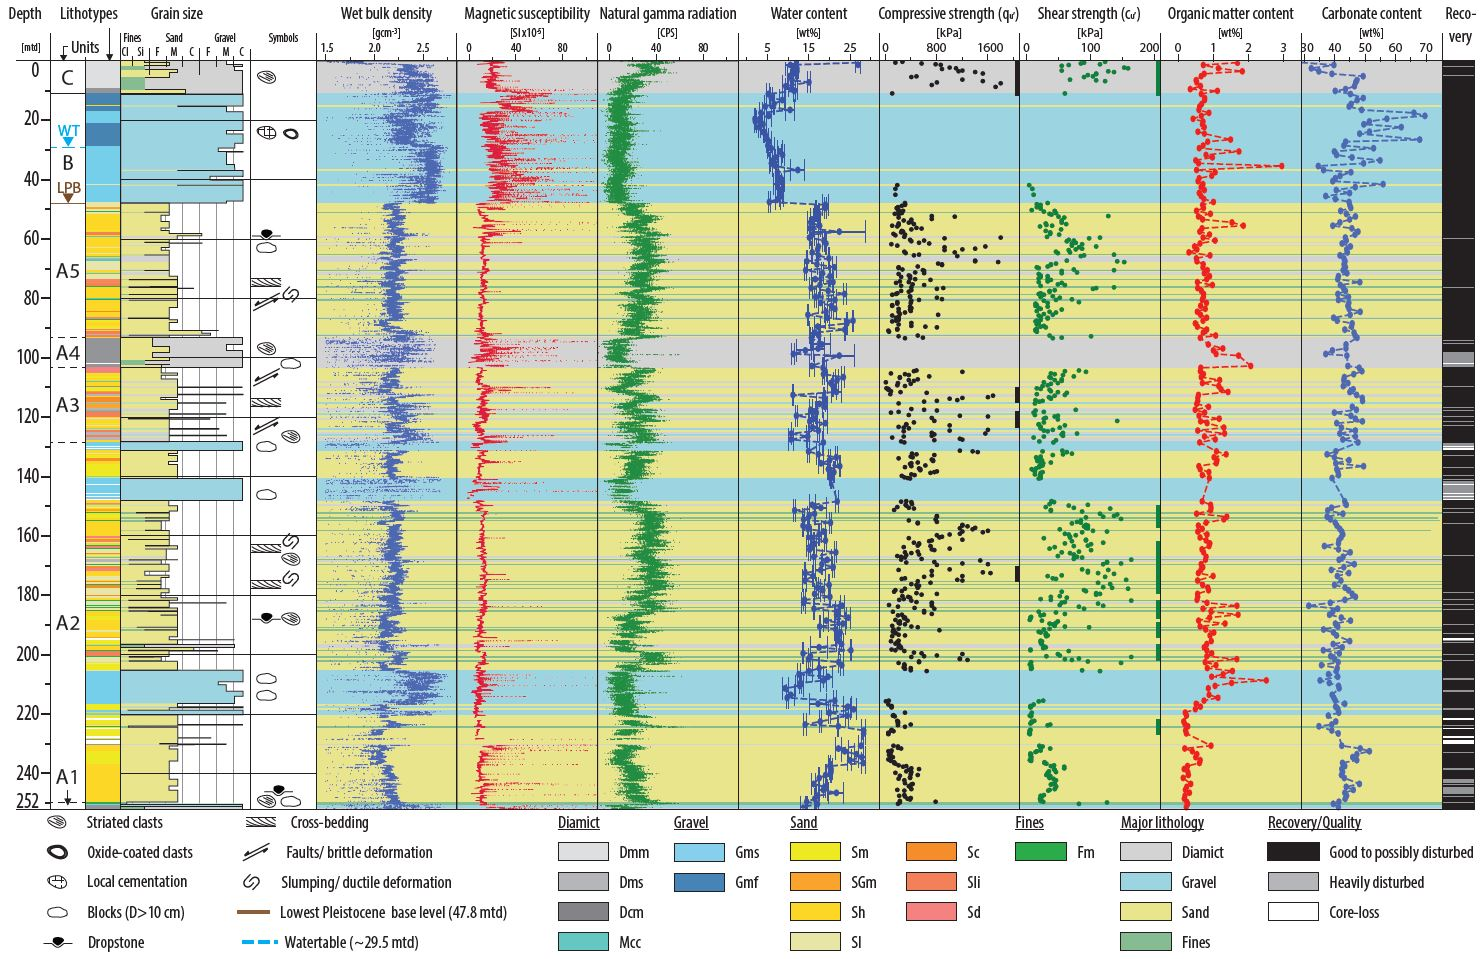

Lithological and petrophysical data versus depth. Columns from left to right: depth-scale [mtd], stratigraphic units (labeled with
A1–A5, B, and C; WTDwater table; LPBDlowest Pleistocene base level), lithotypes, dominant grain size with indicated main lithotypes,
symbols of prominent observations, wet bulk density (gcm^-3), magnetic susceptibility (SI10^-5), natural gamma radiation (CPS,
counts per second), water content with indicated standard deviation (wt %), undrained uniaxial compressive strength (q0u
) (kPa), undrained
shear strength (c0u
) (kPa), organic matter content (wt %), carbonate content (wt %), and the recovery. Main lithotypes are indicated as semitransparent
color codes over the plot’s entire width.

Source: Schaller et al., 2023 (submitted)

# 2. Description of the datasets

## 2.1 Setting up the data

### 2.1.1 Loading necessary libraries

In [2]:
#!pip install jupyter_datatables

In [3]:
#importing the needed libraries

import os #importing OperationSystem modul
import pandas as pd #pandas
import numpy as np #numpy
import scipy #statistic module
from scipy import stats#statistics
import matplotlib.pyplot as plt#matplotlib
import statsmodels.api as sm#statistics
import mpltern# used for ternary plots, no standard python library (see: https://mpltern.readthedocs.io/en/latest/ )
#from jupyter_datatables import init_datatables_mode

### 2.1.2 Input/options for loading data

In [4]:
# Options

control = True # if set to True, control values from the data processing will be printed

# Setting the working directory to the directory (raw string input) where the dataset is located
abs_path_log = r'/Users/pbecerra/Library/CloudStorage/Dropbox/UNIBE/CAS/ADS_course/Module3/M3project/Data'

os.chdir(abs_path_log) # setting working directory to the location of the mscl-log
os.getcwd() # getting the current working directory, to check if I am working in the right directory

'/Users/pbecerra/Library/CloudStorage/Dropbox/UNIBE/CAS/ADS_course/Module3/M3project/Data'

### 2.1.3 Loading the necessary data

In [5]:
# Loading and setting up the dataset.

file_name1 = '5068_2_A_Combined_MSCL_data_filtered_rescaled_20230601_ss.csv' # file name of mscl_data
df_mscl = pd.read_csv(file_name1, header = 0) # loading the data as a pandas data frame, with the original headers
df_mscl.head()

Composite_depth [cm]  Rescaled SECT_DEPTH [cm]  SB_DEPTH [m]  SECT_NUM_MC  \
0              0.000000                  0.000000         0.003          1.0   
1              0.582751                  0.582751         0.008          1.0   
2              1.165501                  1.165501         0.013          1.0   
3              1.748252                  1.748252         0.018          1.0   
4              2.331002                  2.331002         0.023          1.0   

   SECT_DEPTH [cm]  CT [cm]   PWAmp  PWAmp (pw and dens filtred)  PWVel [m/s]  \
0              0.3      NaN     NaN                          NaN          NaN   
1              0.8      NaN     NaN                          NaN          NaN   
2              1.3     10.4  0.0001                          NaN     2211.354   
3              1.8     10.4  0.0000                          NaN     8630.704   
4              2.3     10.4  0.0000                          NaN    20432.220   

   PWVel [m/s] (pw and dens filtred)  ...        Imp      FP  Nat_Gamma [cps]  \
0                                NaN  ...        NaN     NaN              NaN   
1                                NaN  ...        NaN     NaN              NaN   
2                                NaN  ...   1307.078  1.2523          10.6644   
3                                NaN  ...   6438.965  1.1624           9.4644   
4                                NaN  ...  19468.360  1.0424          19.0644   

    K [%]  U [ppm]  Th [ppm]  core_quality  litho types               mes_ID  \
0     NaN      NaN       NaN             4            2  5068_2_A_20210526_1   
1     NaN      NaN       NaN             4            2  5068_2_A_20210526_1   
2 -2.9620 -22.1046   72.1170             0            2  5068_2_A_20210526_1   
3 -1.6882 -24.1719  106.0823             0            2  5068_2_A_20210526_1   
4 -7.6081 -66.6650  158.7609             0            2  5068_2_A_20210526_1   

       section_ID  
0  5068_2_A_001_1  
1  5068_2_A_001_1  
2  5068_2_A_001_1  
3  5068_2_A_001_1  
4  5068_2_A_001_1  

[5 rows x 24 columns]

In [6]:
# Summary of the loaded sediment core drill log dataset

# Extracting column headers and converting them into a Pandas Series
header_data = pd.Series(df_mscl.columns)

# Selecting specific columns of interest: Filtered and UnFiltered density, magnetic logs,
# natural gamma log, data quality classification, and lithoclast classification
used_columns_indices = [10, 13, 16, 20, 21]
header_list_df_reduced = list(header_data[used_columns_indices])

# Creating a new DataFrame with only the selected data columns
df_reduced = df_mscl[header_list_df_reduced]

# Rounding the data to a reasonable precision:
# - Density rounded to 3 significant digits
# - Magnetic and gamma logs rounded to 1 significant digit

# Copying the DataFrame to preserve the original and overwrite with the rounded values
df_reduced = df_reduced.copy()

# Rounding specific columns to the desired precision
df_reduced.iloc[:, 0] = df_reduced[header_list_df_reduced[0]].round(decimals=3).copy()  # Density data
df_reduced.iloc[:, 1:] = df_reduced[header_list_df_reduced[1:]].round(decimals=1).copy()  # Magsus and gamma data

# Displaying the first few rows of the modified DataFrame
df_reduced.head()


Dens [g/cc]  Mag_Sus BS_cor [SI x 10^-5]  Nat_Gamma [cps]  core_quality  \
0          NaN                          NaN              NaN             4   
1          NaN                          NaN              NaN             4   
2        0.591                         13.3             10.7             0   
3        0.746                         14.2              9.5             0   
4        0.953                         14.9             19.1             0   

   litho types  
0            2  
1            2  
2            2  
3            2  
4            2

In [7]:
print("Range of Litho Types:", df_reduced['litho types'].min(), "-", df_reduced['litho types'].max())
print("Range of Core Quality:", df_reduced['core_quality'].min(), "-", df_reduced['core_quality'].max())


Range of Litho Types: 2 - 20
Range of Core Quality: 0 - 4


In [8]:
# Reducing the litho class range to the four main types: D = diamicts (1 <= litho type < 7), G = Gravel (7 <= litho type < 11), S = Sand (11 <= litho type < 19), F = fines (clay +silt; >= 19)

# Assign the value 19 (Fines) to any element in the specified column that is greater than or equal to 19.
df_reduced[header_list_df_reduced[-1]] = np.where(df_reduced[header_list_df_reduced[-1]]>= 19,
                                                 19,df_reduced[header_list_df_reduced[-1]])

# Assign the value 11 (Sand) to any element in the specified column that is less than 19 but greater than or equal to 11.
df_reduced[header_list_df_reduced[-1]] = np.where((df_reduced[header_list_df_reduced[-1]]<19)&
                                                 (df_reduced[header_list_df_reduced[-1]]>= 11),
                                                 11,df_reduced[header_list_df_reduced[-1]])

# Assign the value 7 (Gravel) to any element in the specified column that is less than 19 but greater than or equal to 11.
df_reduced[header_list_df_reduced[-1]] = np.where((df_reduced[header_list_df_reduced[-1]]<11)&
                                                 (df_reduced[header_list_df_reduced[-1]]>= 7),
                                                 7,df_reduced[header_list_df_reduced[-1]])

# Assign the value 1 (Diamicts) to any element in the specified column that is less than 7.
df_reduced[header_list_df_reduced[-1]] = np.where(df_reduced[header_list_df_reduced[-1]]<7,
                                                 1,df_reduced[header_list_df_reduced[-1]])

df_reduced.head()
#df_reduced['core_quality'].max()

Dens [g/cc]  Mag_Sus BS_cor [SI x 10^-5]  Nat_Gamma [cps]  core_quality  \
0          NaN                          NaN              NaN             4   
1          NaN                          NaN              NaN             4   
2        0.591                         13.3             10.7             0   
3        0.746                         14.2              9.5             0   
4        0.953                         14.9             19.1             0   

   litho types  
0            1  
1            1  
2            1  
3            1  
4            1

In [9]:
# Excluding the heavily disturbed data points (-> core quality class >2) and dropping any remaning NaNs (to be safe)

df_reduced_clean = df_reduced[df_reduced[header_list_df_reduced[-2]]<2].copy().dropna()
df_reduced_clean

Dens [g/cc]  Mag_Sus BS_cor [SI x 10^-5]  Nat_Gamma [cps]  \
2            0.591                         13.3             10.7   
3            0.746                         14.2              9.5   
4            0.953                         14.9             19.1   
5            1.053                         15.3             19.3   
6            1.135                         15.5             26.9   
...            ...                          ...              ...   
47583        2.228                        158.1             13.5   
47584        2.225                        166.9             30.3   
47585        2.242                        165.7             23.3   
47586        2.280                        159.6             18.9   
47587        2.144                        154.4             26.3   

       core_quality  litho types  
2                 0            1  
3                 0            1  
4                 0            1  
5                 0            1  
6                 0            1  
...             ...          ...  
47583             0            1  
47584             0            1  
47585             0            1  
47586             0            1  
47587             0            1  

[41631 rows x 5 columns]

In [10]:
# Control prints to see if everything worked out

if control == True:
    print('Information on complete data set: ')
    print(df_mscl.info()) # prints info of complete data set
    print()

    print('Information on reduced data set:')
    print(df_reduced.info()) # info of reduced data frame
    print('First 5 rows of the reduced data set: ')
    print(df_reduced.head())
    print()

    print('Information on reduced and cleaned data set: ')
    print(df_reduced_clean.info())   
    print('First 5 rows of the reduced and cleaned data set: ')
    print(df_reduced_clean.head())
    print()

Information on complete data set: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47591 entries, 0 to 47590
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Composite_depth [cm]               47591 non-null  float64
 1   Rescaled SECT_DEPTH [cm]           47591 non-null  float64
 2   SB_DEPTH [m]                       47591 non-null  float64
 3   SECT_NUM_MC                        47591 non-null  float64
 4   SECT_DEPTH [cm]                    47591 non-null  float64
 5   CT [cm]                            46350 non-null  float64
 6   PWAmp                              46350 non-null  float64
 7   PWAmp (pw and dens filtred)        3647 non-null   float64
 8   PWVel [m/s]                        46350 non-null  float64
 9   PWVel [m/s] (pw and dens filtred)  3647 non-null   float64
 10  Dens [g/cc]                        46350 non-null  float64
 11  Dens [g/cc] (pw and

## 2.2 Distribution overview: Pie Plots
### 2.2.1 Setting up the data

In [11]:
# Setting up and extracting the needed data for the Filtered impact plot on lithology and core quality distribution

# Unfiltered

# total number of data points
total_nr_dp_uf = len(df_reduced[header_list_df_reduced[-2]]) # total number of data points

# counts of unique values in quality (classes) and lithologies (main litho groups)
values_cq_uf, counts_cq_uf = np.unique(df_reduced[header_list_df_reduced[-2]], return_counts= True) # quality
values_lith_uf, counts_lith_uf = np.unique(df_reduced[header_list_df_reduced[-1]], return_counts= True) # lithology

# Filtered

# total number of data points
total_nr_dp_c = len(df_reduced_clean[header_list_df_reduced[-2]]) # total number of data point

# counts of unique values in quality (classes) and lithologies (main litho groups)
values_cq_c, counts_cq_c = np.unique(df_reduced_clean[header_list_df_reduced[-2]], return_counts= True) # quality
values_lith_c, counts_lith_c = np.unique(df_reduced_clean[header_list_df_reduced[-1]], return_counts= True) # lithology

if control == True:
    print(f'Number of NaNs in UnFiltered dataset: {df_reduced[header_list_df_reduced[0]].isna().sum()} (should be equal to the number of points (frequency) of Core Quality = 4)')
    print(f'Number of NaNs in Filtered dataset: {df_reduced_clean[header_list_df_reduced[0]].isna().sum()} (should be 0)')
    print('Lithoclasses: Diamict (1), Gravel (7), Sand (11), and Fines (19)')
    print(f'Unfiltered quality clases:{values_cq_uf}, corresponding frequencies: {counts_cq_uf}')
    print(f'Unfiltered litho classes {values_lith_uf}, corresponding frequencies: {counts_lith_uf}')        
    print(f'Filtered quality clases:{values_cq_c}, corresponding frequencies: {counts_cq_c}')
    print(f'Filtered litho classes {values_lith_c}, corresponding frequencies: {counts_lith_c}')

Number of NaNs in UnFiltered dataset: 1241 (should be equal to the number of points (frequency) of Core Quality = 4)
Number of NaNs in Filtered dataset: 0 (should be 0)
Lithoclasses: Diamict (1), Gravel (7), Sand (11), and Fines (19)
Unfiltered quality clases:[0 1 2 4], corresponding frequencies: [34047  7584  4719  1241]
Unfiltered litho classes [ 1  7 11 19], corresponding frequencies: [ 6248 11094 29297   952]
Filtered quality clases:[0 1], corresponding frequencies: [34047  7584]
Filtered litho classes [ 1  7 11 19], corresponding frequencies: [ 4845  9657 26210   919]


### 2.2.2 Overview of quality and litho distribution pie plots with filter impact

Text(0.5, 1.0, 'Cleaned distribution of main lithologies(n total = 41631)')

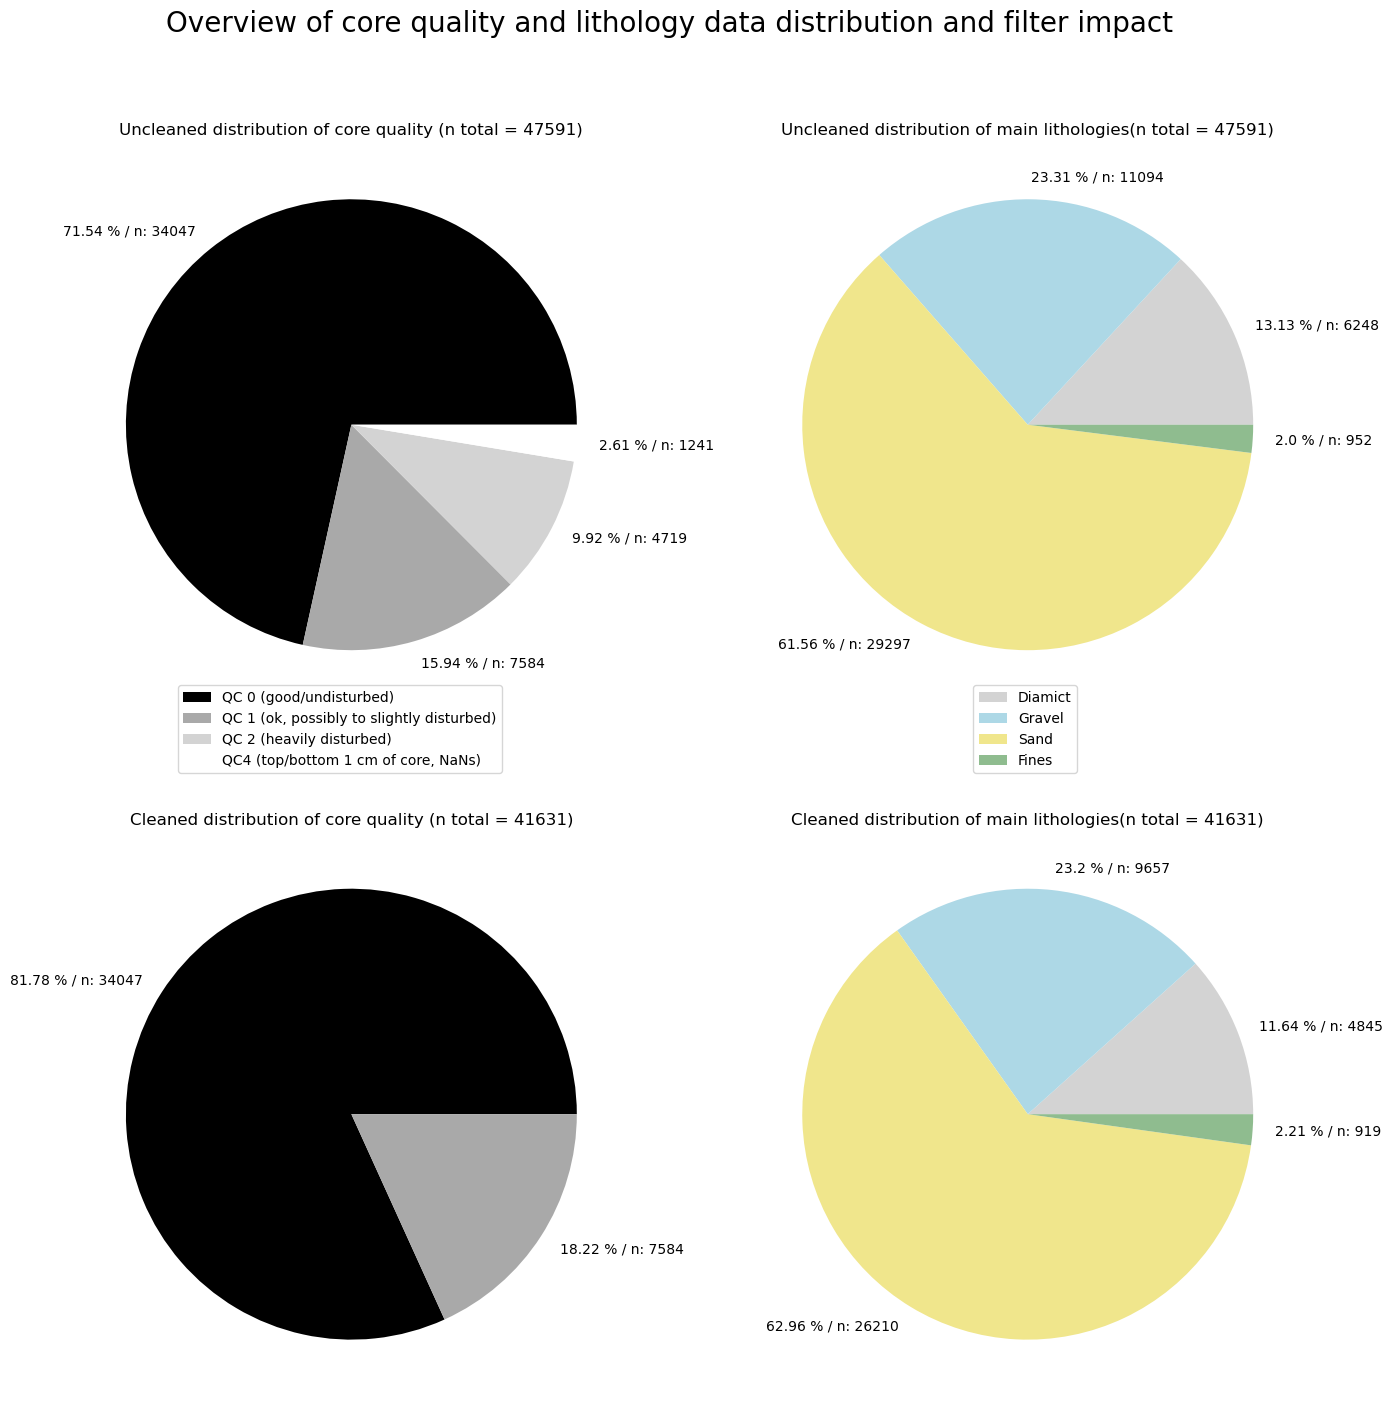

In [12]:
# Creating 4 pie-plots showing the distribution of the quality classes and the four main litho types
# Before and after applying the quality filter

# List of legend labels for plot
labels_cq = ['QC 0 (good/undisturbed)','QC 1 (ok, possibly to slightly disturbed)',
          'QC 2 (heavily disturbed)', 'QC4 (top/bottom 1 cm of core, NaNs)']
labels_lith = ['Diamict','Gravel','Sand','Fines']

# Colors for plots
colors_cq = ['k','darkgrey','lightgrey','w']#quality
colors_lith = ['lightgray','lightblue','khaki','darkseagreen']#lithology

# Converting the counts into %
# Unfiltered
sizes_cq_uf = np.multiply(np.divide(counts_cq_uf,len(df_reduced[header_list_df_reduced[-1]])),100) # quality
sizzes_lith_uf = np.multiply(np.divide(counts_lith_uf,len(df_reduced[header_list_df_reduced[-1]])),100) # lithology

# Filtered
sizes_cq_c = np.multiply(np.divide(counts_cq_c,len(df_reduced_clean[header_list_df_reduced[-1]])),100) # quality
sizzes_lith_c = np.multiply(np.divide(counts_lith_c,len(df_reduced_clean[header_list_df_reduced[-1]])),100) # lithology

# Producing the numerical labels (% and total number of datapoints of each pie piece)
# Unfiltered
labels_cq_nr_uf = [f'{sizes_cq_uf[i].round(2)} % / n: {counts_cq_uf[i]}' for i in range(len(sizes_cq_uf))] # quality
# lithology
labels_lith_nr_uf = [f'{sizzes_lith_uf[i].round(2)} % / n: {counts_lith_uf[i]}' for i in range(len(sizzes_lith_uf))]
# Filtered
labels_cq_nr_c = [f'{sizes_cq_c[i].round(2)} % / n: {counts_cq_c[i]}' for i in range(len(sizes_cq_c))] # quality
labels_lith_nr_c = [f'{sizzes_lith_c[i].round(2)} % / n: {counts_lith_c[i]}' for i in range(len(sizzes_lith_c))] # lithology

fig0, ax = plt.subplots(2,2, figsize=(16,16)) # Setting up the subplots Settings
fig0.suptitle('Overview of core quality and lithology data distribution and filter impact',fontsize=20) # setting the position of the title
fig0.subplots_adjust(top=0.9) # addjusting title

# Ploting the pie plots
# Unfiltered
ax[0][0].pie(sizes_cq_uf, colors = colors_cq,labels=labels_cq_nr_uf) # quality
ax[0][1].pie(sizzes_lith_uf, colors = colors_lith,labels=labels_lith_nr_uf) # lithology
# Filtered
ax[1][0].pie(sizes_cq_c, colors = colors_cq,labels=labels_cq_nr_c) # quality
ax[1][1].pie(sizzes_lith_c, colors = colors_lith,labels=labels_lith_nr_c) # lithology

# Legends (same for both Unfiltered and Filtered)
ax[0][0].legend(bbox_to_anchor=(0.78, 0.05), labels = labels_cq ) # quality
ax[0][1].legend(bbox_to_anchor=(0.6, 0.05),labels = labels_lith ,loc="best") # lithology

# Unfiltered
ax[0][0].set_title(f'Uncleaned distribution of core quality (n total = {total_nr_dp_uf})') # quality
ax[0][1].set_title(f'Uncleaned distribution of main lithologies(n total = {total_nr_dp_uf})') # lithology
# Filtered
ax[1][0].set_title(f'Cleaned distribution of core quality (n total = {total_nr_dp_c})') # quality
ax[1][1].set_title(f'Cleaned distribution of main lithologies(n total = {total_nr_dp_c})') # lithology


## 2.3 Histograms of the overall distributions of the logs
### 2.3.1 Setting up the data

In [13]:
# Separating the data into its individual logs (density, Magnetic susceptibility, and natural gamma radiation)
# Adding an individual filter on each log, separating the logs in ints subsets of the four main litho groups for individual plots

litho_list = [1,7,11,19] # list with numerical code of main litho types (1=diamict, 7=gravel, 11=sand, 19= fines)

# All data unfiltered 
dens_uf = df_reduced[header_list_df_reduced[0]].copy() # density
magsus_uf = df_reduced[header_list_df_reduced[1]].copy() # Magsus
natgamma_uf = df_reduced[header_list_df_reduced[2]].copy() # natural gamma radiation

# All data Filtered (type 3 removed)
dens_fc = df_reduced_clean[header_list_df_reduced[0]].copy() # density
magsus_fc = df_reduced_clean[header_list_df_reduced[1]].copy() # Magsus
natgamma_fc = df_reduced_clean[header_list_df_reduced[2]].copy() # natural gamma radiation

# Individual logs: filtered
dens_fc = dens_fc[dens_fc>=1.5].dropna() # removing data <1.5 g/cm^3 and dropping any remaining NaNs
magsus_fc = magsus_fc[magsus_fc<=100].dropna() # removing data <1.5 g/cm^3 and dropping any remaining NaNs
natgamma_fc = natgamma_fc[natgamma_fc>=0].dropna() # removing data <1.5 g/cm^3 and dropping any remaining NaNs

# Pre-locating the produced subdata sets
# unfiltered
dens_values_stacked_hist_uf = [0]*len(litho_list) # density
magsus_values_stacked_hist_uf = [0]*len(litho_list) # Magsus
natgamma_values_stacked_hist_uf = [0]*len(litho_list) # natural gamma radiation

# filtered 
dens_values_stacked_hist_fc = [0]*len(litho_list) # density
magsus_values_stacked_hist_fc = [0]*len(litho_list) # Magsus
natgamma_values_stacked_hist_fc = [0]*len(litho_list) # natural gamma radiation

# Statistical summary of  data
dens_summary_list_fc = [0]*len(litho_list)#density
magsus_summary_list_fc = [0]*len(litho_list)#Magsus
natgamma_summary_list_fc = [0]*len(litho_list)#natural gamma radiation

# for-loop to mask over the four main lithogroups and extract the sub-datasets and the statistical summary for later use (pd.describe())
for i in range(len(litho_list)): 

    #masking over the four main litho types, 
    #density
    dens_data_uf = dens_uf[df_reduced[header_list_df_reduced[-1]] == litho_list[i]]#unfiltered
    dens_data_fc = dens_fc[df_reduced_clean[header_list_df_reduced[-1]] == litho_list[i]]#filtered 
    #Magsus
    magsus_data_uf = magsus_uf[df_reduced[header_list_df_reduced[-1]] == litho_list[i]]#unfiltered
    magsus_data_fc = magsus_fc[df_reduced_clean[header_list_df_reduced[-1]] == litho_list[i]]#filtered 
    #natural gamma radiation
    natgamma_data_uf = natgamma_uf[df_reduced[header_list_df_reduced[-1]] == litho_list[i]]#unfiltered
    natgamma_data_fc = natgamma_fc[df_reduced_clean[header_list_df_reduced[-1]] == litho_list[i]] #filtered 
    

    #adding the data to the coresponding lsit
    #density
    dens_values_stacked_hist_uf[i]= dens_data_uf#unfiltered
    dens_values_stacked_hist_fc[i]= dens_data_fc#filtered
    #Magsus
    magsus_values_stacked_hist_uf[i]= magsus_data_uf#unfiltered
    magsus_values_stacked_hist_fc[i]= magsus_data_fc#filtered
    #natural gamma radiation
    natgamma_values_stacked_hist_uf[i]= natgamma_data_uf#unfiltered
    natgamma_values_stacked_hist_fc[i]= natgamma_data_fc#filtered
        
    #adding the statisitcal output summary of the filtered sub-dataset
    dens_summary_list_fc[i] = pd.DataFrame(dens_data_fc.describe()).round(2)#density
    magsus_summary_list_fc[i] = pd.DataFrame(magsus_data_fc.describe()).round(2)#Magsus
    natgamma_summary_list_fc[i] = pd.DataFrame(natgamma_data_fc.describe()).round(2)#natural gamma radiation
    
if control == True:
    print('Summary of the unfiltered and uncleaned density data and its four subsets:')
    print(dens_uf.describe(),[dens_values_stacked_hist_uf[i].describe() for i in range(len(dens_values_stacked_hist_uf))])
    print('Summary of the filtered and cleaned density data and its four subsets:')
    print(dens_fc.describe(),[dens_values_stacked_hist_fc[i].describe() for i in range(len(dens_values_stacked_hist_fc))])
    print(f'Number of NaNs  in the cleaned density data: {dens_fc.isna().sum()}') 
    print()

    print('Summary of the unfiltered and uncleaned magnetic susceptibility data and its four subsets:')
    print(magsus_uf.describe(),[magsus_values_stacked_hist_uf[i].describe() for i in range(len(magsus_values_stacked_hist_uf))])
    print('Summary of the filtered and cleaned magnetic susceptibility data and its four subsets:')
    print(magsus_fc.describe(),[magsus_values_stacked_hist_fc[i].describe() for i in range(len(magsus_values_stacked_hist_fc))])
    print(f'Number of NaNs  in the cleaned magnetic susceptibility data: {magsus_fc.isna().sum()}')    
    print()

    print('Summary of the unfiltered and uncleaned natural gamma radiation data and its four subsets:')
    print(natgamma_uf.describe(),[natgamma_values_stacked_hist_uf[i].describe() for i in range(len(natgamma_values_stacked_hist_uf))])
    print('Summary of the filtered and cleaned natural gamma radiation data and its four subsets:')
    print(natgamma_fc.describe(),[natgamma_values_stacked_hist_fc[i].describe() for i in range(len(natgamma_values_stacked_hist_fc))])
    print(f'Number of NaNs  in the cleaned natural gamma radiation data: {natgamma_fc.isna().sum()}')
    print()

Summary of the unfiltered and uncleaned density data and its four subsets:
count    46350.000000
mean         2.203907
std          0.250445
min         -0.006000
25%          2.129000
50%          2.208000
75%          2.310000
max          2.782000
Name: Dens [g/cc], dtype: float64 [count    6095.000000
mean        2.208390
std         0.310299
min         0.115000
25%         2.139000
50%         2.287000
75%         2.386000
max         2.712000
Name: Dens [g/cc], dtype: float64, count    10794.000000
mean         2.362448
std          0.311698
min         -0.006000
25%          2.288000
50%          2.430000
75%          2.558000
max          2.782000
Name: Dens [g/cc], dtype: float64, count    28522.000000
mean         2.143183
std          0.176457
min          0.010000
25%          2.107000
50%          2.177000
75%          2.227000
max          2.613000
Name: Dens [g/cc], dtype: float64, count    939.000000
mean       2.196821
std        0.086812
min        1.380000
25%      

### 2.3.2 Distribution of the overall density data

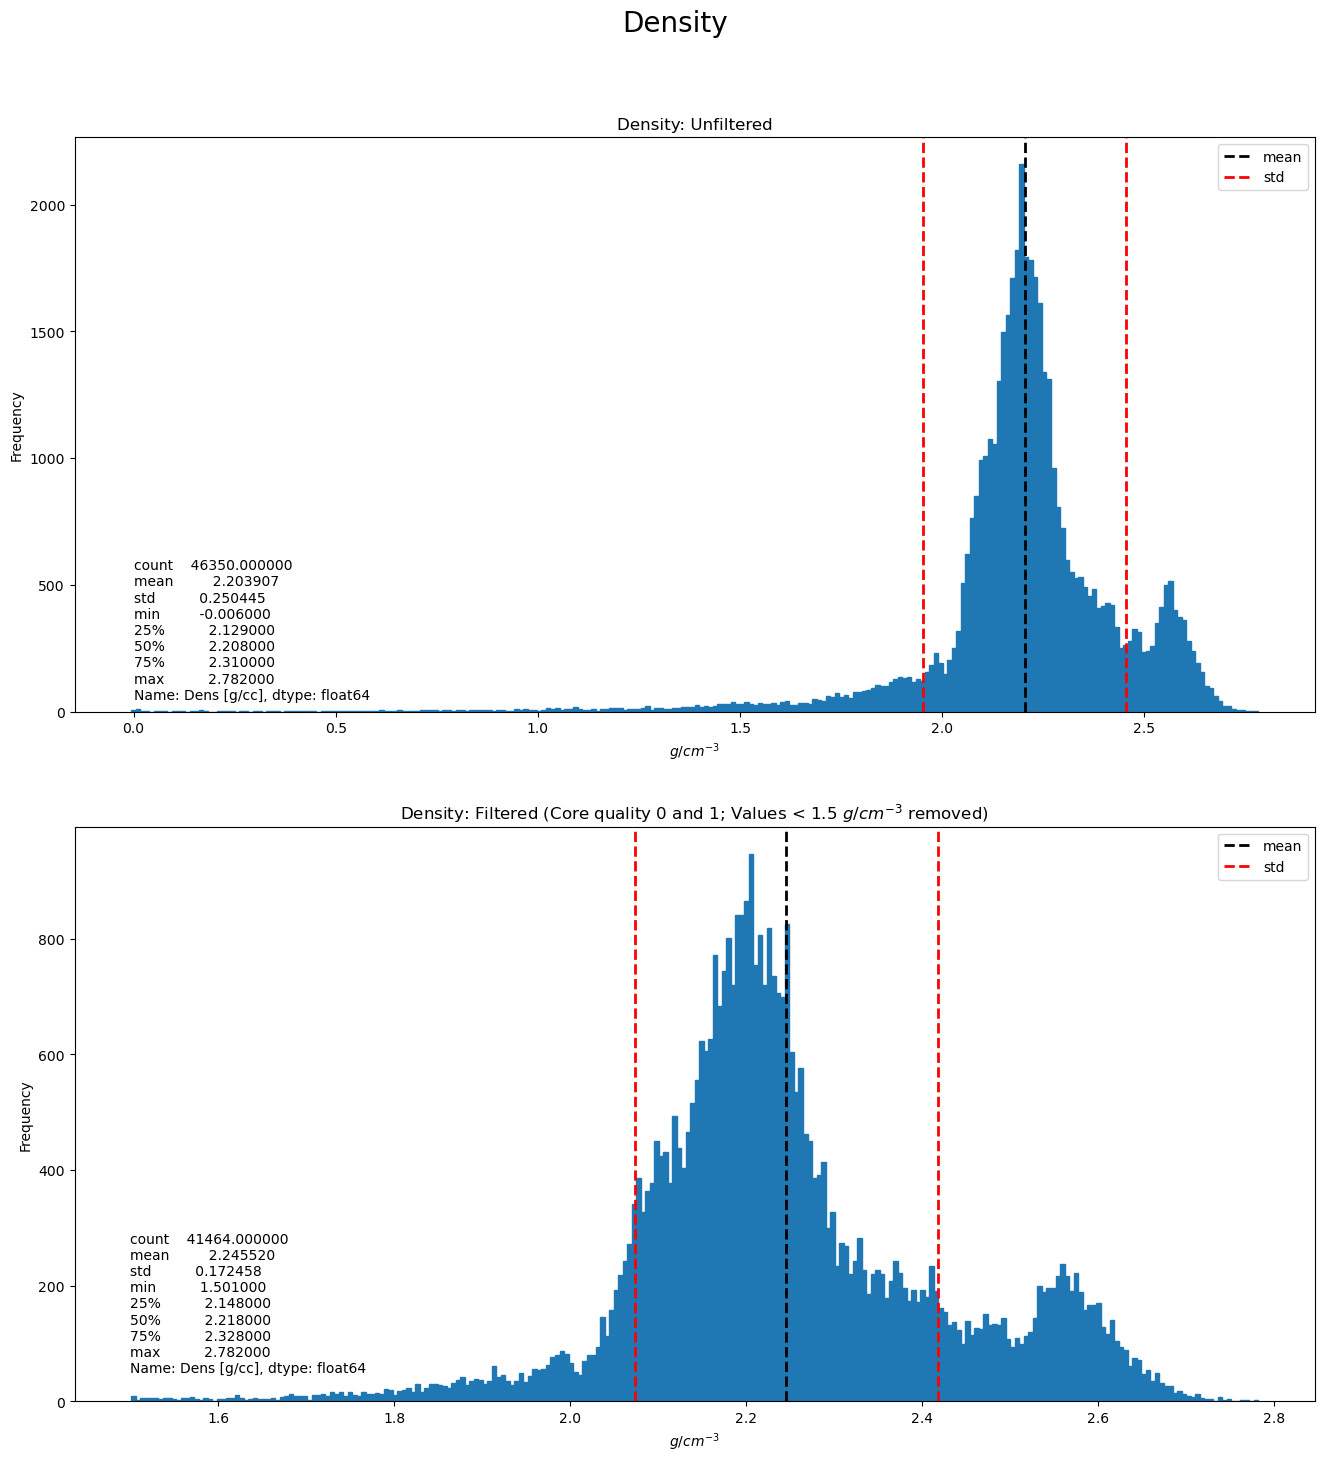

In [14]:
# Histograms of overall density data sets, with impact of filters and cleaning up (plot 0 = unfiltered, 
# plot 1 = filtered, <1.5 g/cm3 removed, quality class 0 and 1 (good to acceptable data quality), and all NaNs removed)

# setting up the supplots
fig, ax = plt.subplots(2,1, figsize=(16,16))
fig.suptitle('Density',fontsize=20) 
# setting the position of the title
fig.subplots_adjust(top=0.9)

# Histogramm
ax[0].hist(dens_uf, bins=250,fill=True,histtype='step')#
ax[1].hist(dens_fc, bins=250, fill=True,histtype='step')#

# Plot of the mean
ax[0].axvline(dens_uf.mean(), ls = '--',lw=2, color='k',label = 'mean')
ax[1].axvline(dens_fc.mean(), ls = '--',lw=2, color='k',label = 'mean')

# mean + std
ax[0].axvline(dens_uf.mean() + dens_uf.std(), ls = '--',lw=2, color='r',label = 'std')
ax[1].axvline(dens_fc.mean() + dens_fc.std(), ls = '--',lw=2, color='r',label = 'std')

# mean - std
ax[0].axvline(dens_uf.mean() - dens_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(dens_fc.mean() - dens_fc.std(),ls = '--',lw=2, color='r')

# Plot title
ax[0].set_title('Density: Unfiltered')
ax[1].set_title('Density: Filtered (Core quality 0 and 1; Values < 1.5 $\t{g/cm}^{-3}$ removed)')

# x-axis label
ax[0].set_xlabel('$\t{g/cm}^{-3}$')
ax[1].set_xlabel('$\t{g/cm}^{-3}$')

# y-axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# Display statistical overview of the data used in the plot
ax[0].text (0,50,f'{dens_uf.describe()}')
ax[1].text (1.5,50,f'{dens_fc.describe()}')

# Legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

### 2.3.3 Distribution of the overall magnetic susceptibility data

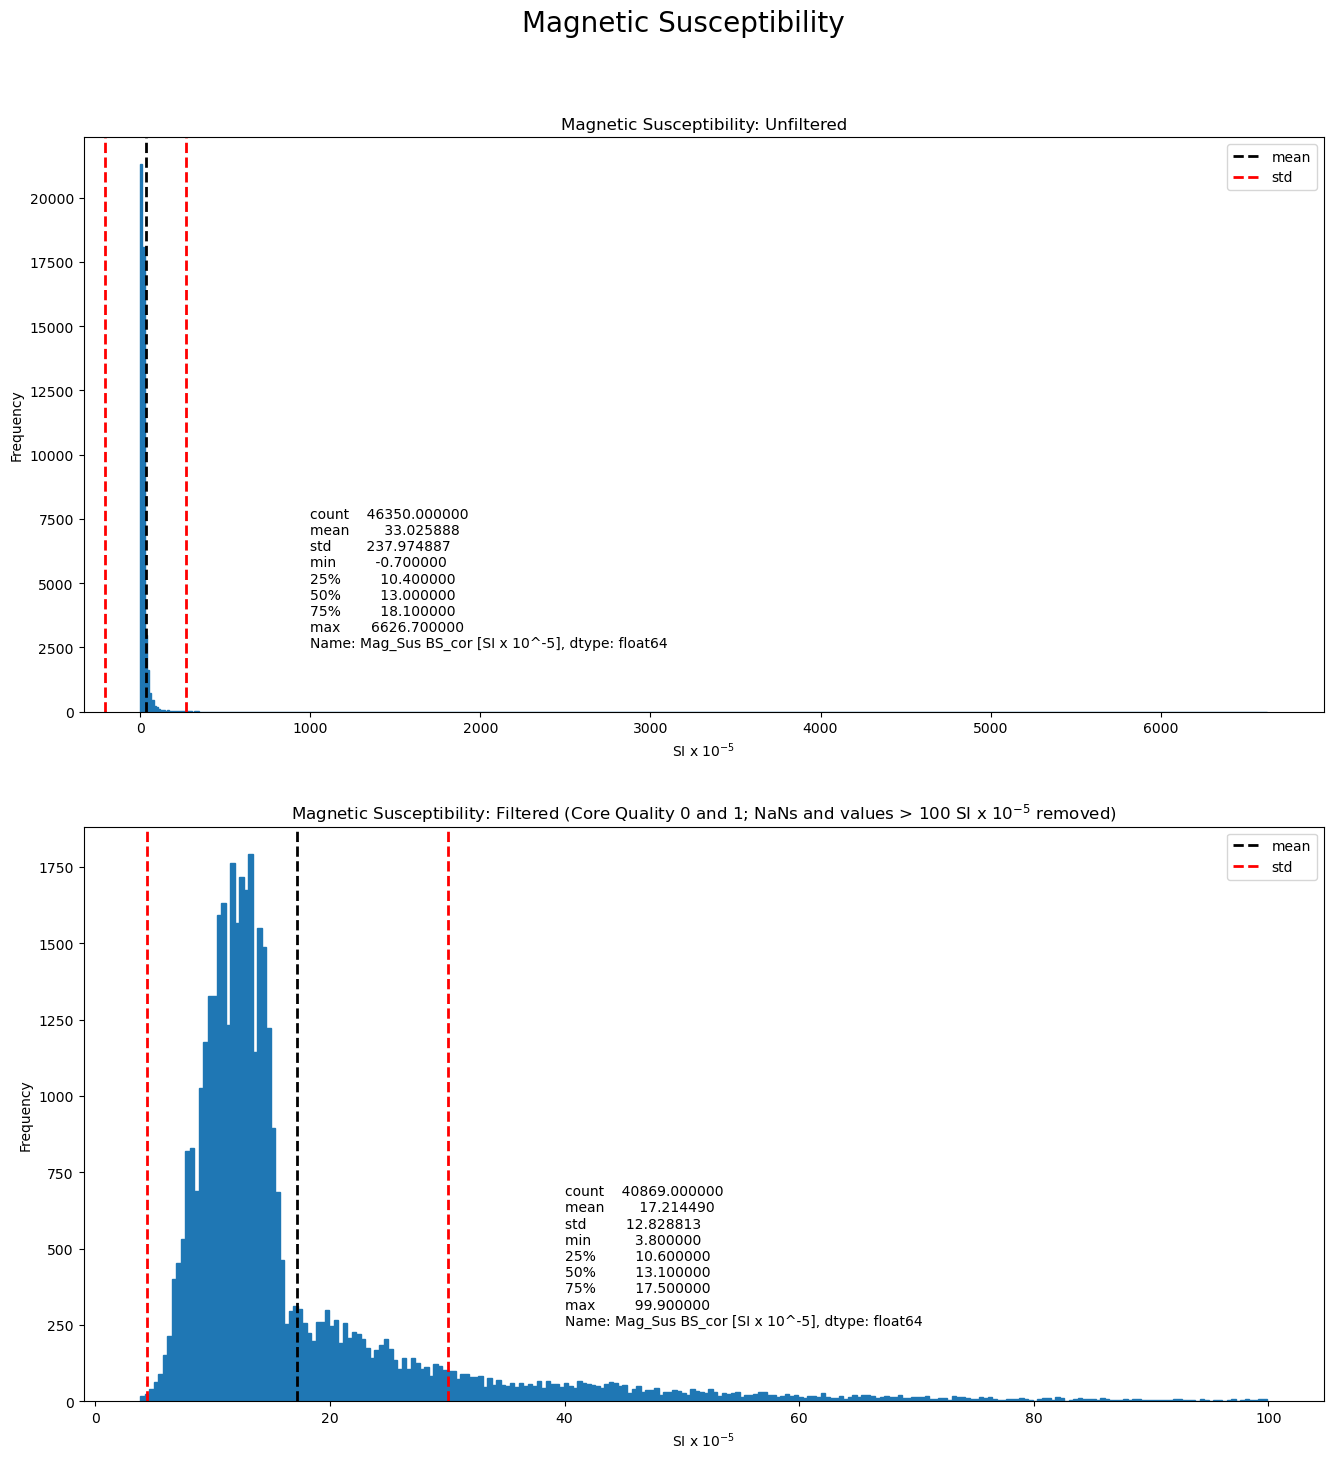

In [15]:
# Histograms of overaLL magsus data sets, with impact of filters and cleaning up (plot 0 = unfiltered, 
# plot 1 = filtered, <100 SIx10^-5 removed, quality class 0 and 1 (good to acceptable data quality), and all NaNs removed)

# setting up the supplots
fig1, ax = plt.subplots(2,1, figsize=(16,16))
fig1.suptitle('Magnetic Susceptibility',fontsize=20) 
# setting the position of the title
fig1.subplots_adjust(top=0.9)

#Histogram
ax[0].hist(magsus_uf, bins=500,fill=True,histtype='step')#
ax[1].hist(magsus_fc, bins=250, fill=True,histtype='step')#

#plot of the mean
ax[0].axvline(magsus_uf.mean(), ls = '--',lw=2, color='k',label = 'mean')#mean
ax[1].axvline(magsus_fc.mean(), ls = '--',lw=2, color='k',label = 'mean')

#mean + std
ax[0].axvline(magsus_uf.mean() + magsus_uf.std(), ls = '--',lw=2, color='r',label = 'std')
ax[1].axvline(magsus_fc.mean() + magsus_fc.std(), ls = '--',lw=2, color='r',label = 'std')

#mean - std
ax[0].axvline(magsus_uf.mean() - magsus_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(magsus_fc.mean() - magsus_fc.std(),ls = '--',lw=2, color='r')

#plot title
ax[0].set_title('Magnetic Susceptibility: Unfiltered')
ax[1].set_title('Magnetic Susceptibility: Filtered (Core Quality 0 and 1; NaNs and values > 100 SI x 10$^{-5}$ removed)')

#x-axis label
ax[0].set_xlabel('SI x 10$^{-5}$')
ax[1].set_xlabel('SI x 10$^{-5}$')

#y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# Display statistical overview of the data used in the plot
ax[0].text (1000,2500,f'{magsus_uf.describe()}')
ax[1].text (40,250,f'{magsus_fc.describe()}')

#legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

### 2.3.4 Distribution of the overall Natural Gamma Radiation data

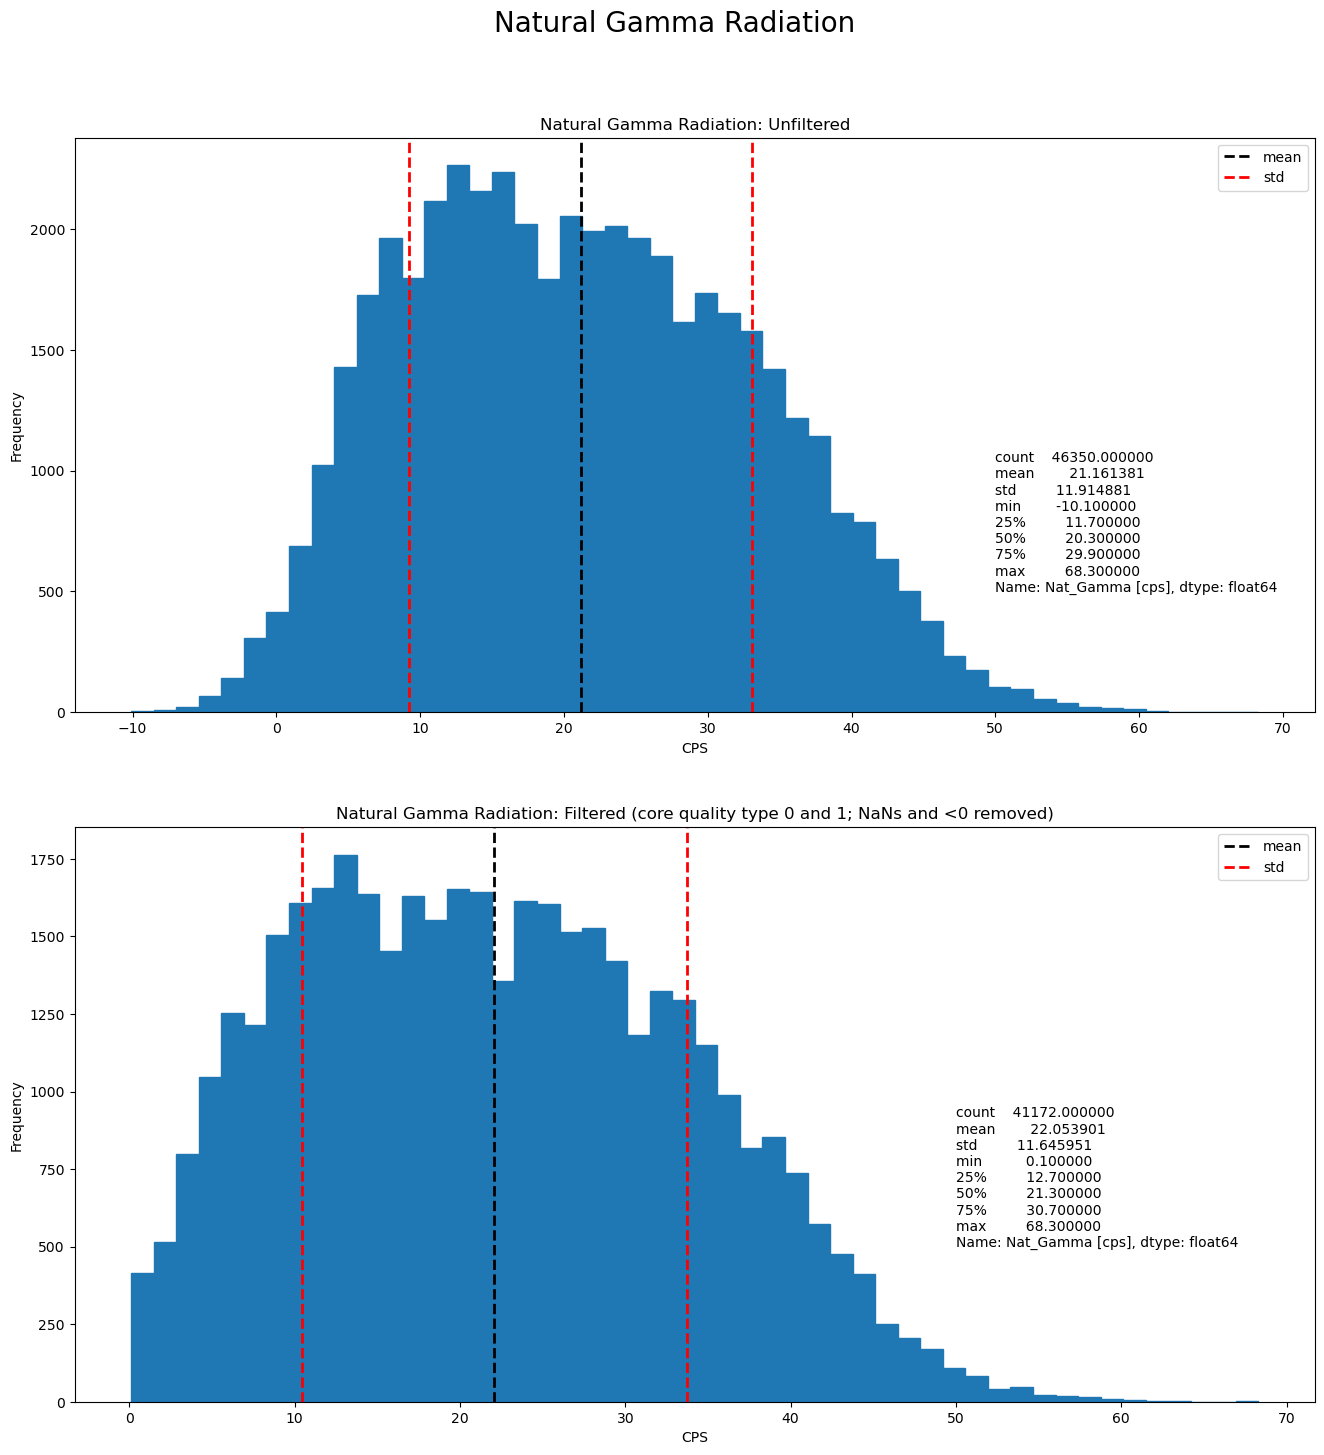

In [16]:
#histograms of overaLL natural gamma radiation data sets, with impact of filters and cleaning up (plot 0 = uncleaned, 
#plot 1 = quality clas 0 and 1 quality class 0 and 1 (good to acceptable data quality), and all NaNs removed)

#setting up the supplots
fig2, ax = plt.subplots(2,1, figsize=(16,16))
fig2.suptitle('Natural Gamma Radiation',fontsize=20) 
#setting the position of the title
fig2.subplots_adjust(top=0.9)


#Histogram
ax[0].hist(natgamma_uf, bins=50,fill=True,histtype='step')
ax[1].hist(natgamma_fc, bins=50, fill=True,histtype='step')

#plot of the mean
ax[0].axvline(natgamma_uf.mean(), ls = '--',lw=2, color='k',label = 'mean')#mean
ax[1].axvline(natgamma_fc.mean(), ls = '--',lw=2, color='k',label = 'mean')

#mean + std
ax[0].axvline(natgamma_uf.mean() + natgamma_uf.std(), ls = '--',lw=2, color='r',label = 'std')
ax[1].axvline(natgamma_fc.mean() + natgamma_fc.std(), ls = '--',lw=2, color='r',label = 'std')

#mean - std
ax[0].axvline(natgamma_uf.mean() - natgamma_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(natgamma_fc.mean() - natgamma_fc.std(),ls = '--',lw=2, color='r')

#plot title
ax[0].set_title('Natural Gamma Radiation: Unfiltered')
ax[1].set_title('Natural Gamma Radiation: Filtered (core quality type 0 and 1; NaNs and <0 removed)')

#x-axis label
ax[0].set_xlabel('CPS')
ax[1].set_xlabel('CPS')

#y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# plots statistic overview of used data
ax[0].text (50,500,f'{natgamma_uf.describe()}')
ax[1].text (50,500,f'{natgamma_fc.describe()}')

#legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

## 2.4 Distribution of the lithoclast groups of the logs

### 2.4.1 Distribution of the litho groups of the density log

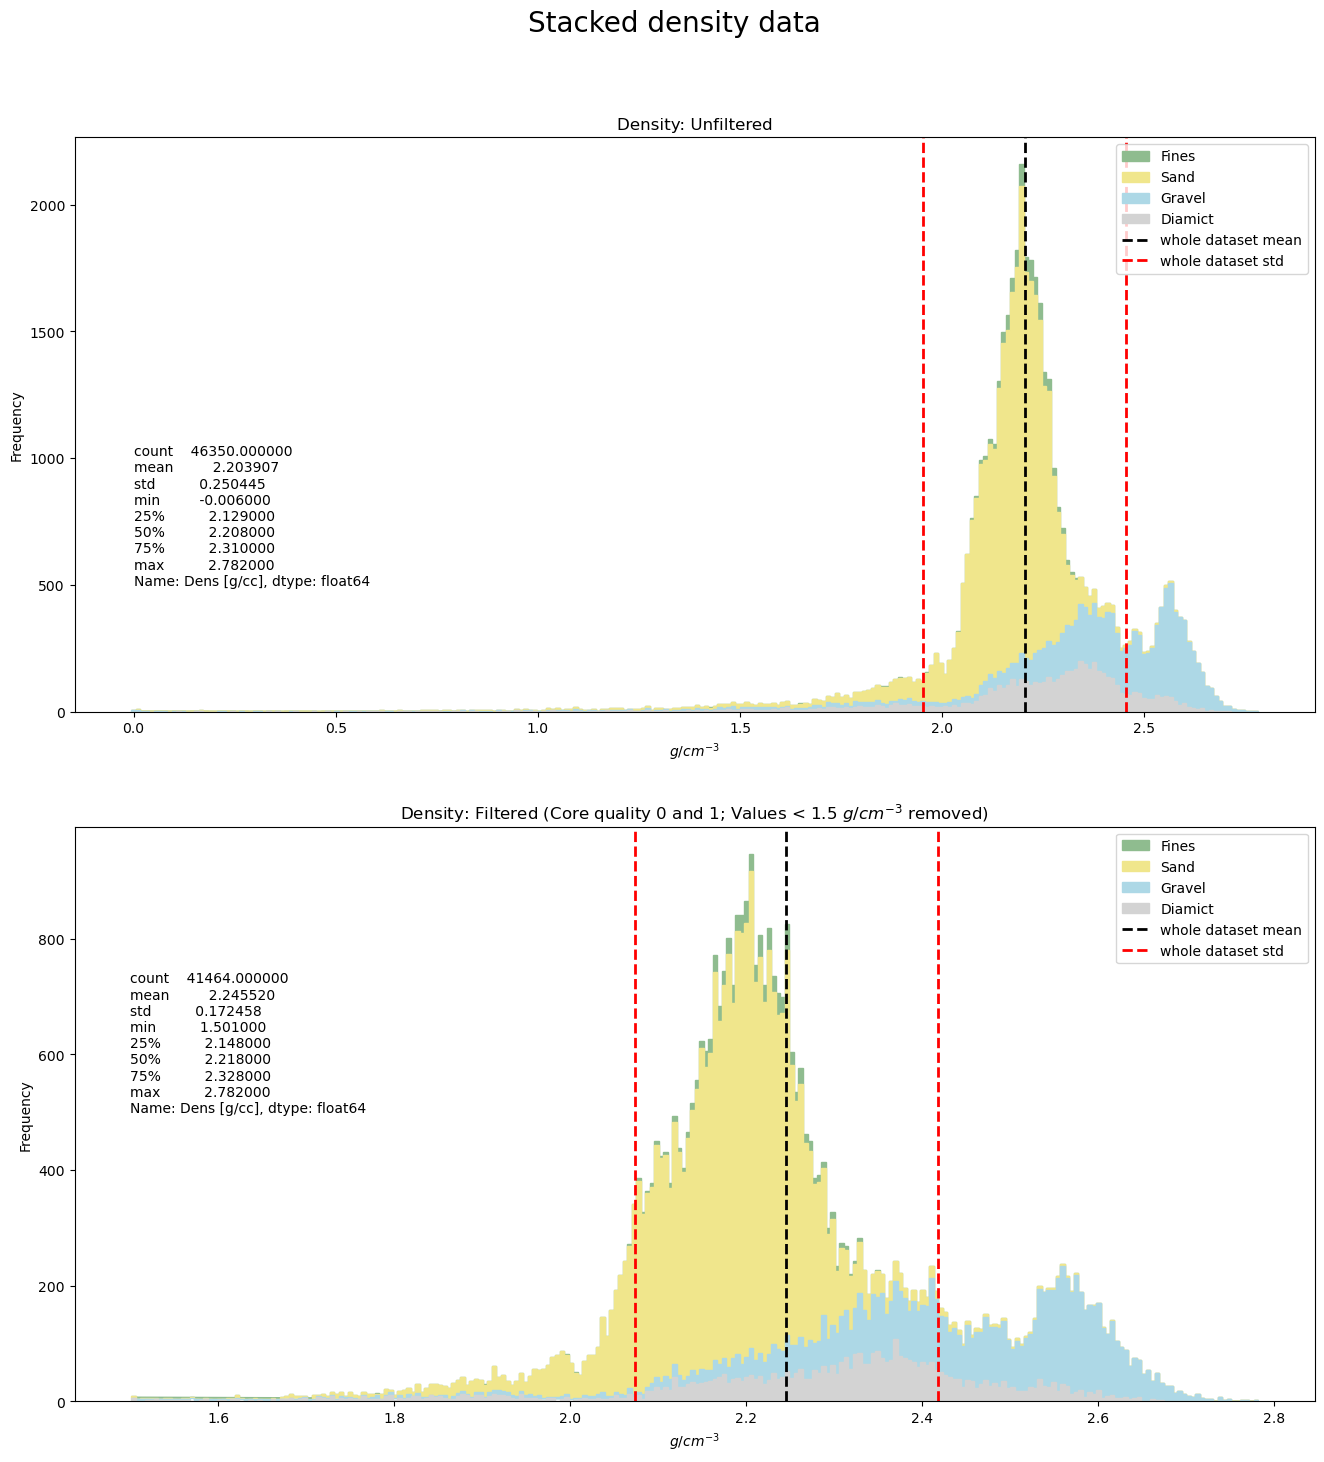

In [73]:
#stacked histograms of the density data sets of the four main litho groups (Diamicts,Gravel, Sand, and Fines),
#with impact of filters and cleaning up (plot 0 = uncleand, plot 1 = filtered, <1.5 g/cm3 rmoved, plot 2 = quality 
#clas 0 and 1 (good to aceptebal data quality,and all NaNs removed)). Over all mean and std ration is plotted over the 
#histograms, the summary of the complete data set is also provided in the plot

#Setting up needed input
colors = ['lightgray','lightblue','khaki','darkseagreen']#color list
labels = ['Diamict','Gravel','Sand','Fines']#list of labels for subsets of histograms

#Setting up the supplots
fig3, ax = plt.subplots(2,1, figsize=(16,16))
fig3.suptitle('Stacked density data',fontsize=20) 
#Setting the position of the title
fig3.subplots_adjust(top=0.9)

#histogram
ax[0].hist(dens_values_stacked_hist_uf, bins=250,fill=True,histtype='step', stacked=True, color=colors, label=labels)
ax[1].hist(dens_values_stacked_hist_fc, bins=250, fill=True,histtype='step',stacked=True, color=colors, label=labels)

#mean
ax[0].axvline(dens_uf.mean(), ls = '--',lw=2, color='k',label = 'whole dataset mean')
ax[1].axvline(dens_fc.mean(), ls = '--',lw=2, color='k',label = 'whole dataset mean')

#mean + std
ax[0].axvline(dens_uf.mean() + dens_uf.std(), ls = '--',lw=2, color='r',label = 'whole dataset std')
ax[1].axvline(dens_fc.mean() + dens_fc.std(), ls = '--',lw=2, color='r',label = 'whole dataset std')

#mean - std
ax[0].axvline(dens_uf.mean() - dens_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(dens_fc.mean() - dens_fc.std(),ls = '--',lw=2, color='r')

#plot title
ax[0].set_title('Density: Unfiltered')
ax[1].set_title('Density: Filtered (Core quality 0 and 1; Values < 1.5 $\t{g/cm}^{-3}$ removed)')

#x-axis label
ax[0].set_xlabel('$\t{g/cm}^{-3}$')
ax[1].set_xlabel('$\t{g/cm}^{-3}$')

#y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# plots statistic overview of used data
ax[0].text (0,500,f'{dens_uf.describe()}') 
ax[1].text (1.5,500,f'{dens_fc.describe()}') 

#legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

#### 2.4.1.1 Testing for normality: overall density data

In [79]:
# normality test for the cleaned overall density data set
print('P-values from the normality tests on the cleaned density data (D`Agostino-Pearson):')
alpha = 0.05
k2, p = stats.normaltest(dens_fc) # D Agostino-Pearson
print('%10s %1.4f ' % ('P-value:',p)) # printing the values
if p < alpha:
    print("The data does not follow a normal distribution")
else:
    print("The data follows a normal distribution")


P-values from the normality tests on the cleaned density data (D`Agostino-Pearson):
  P-value: 0.0000 
The data does not follow a normal distribution


#### 2.4.1.2  Q-Q plot of the overall density data distribution

Text(0.5, 1.0, 'Q-Q-plot of cleaned density dataset')

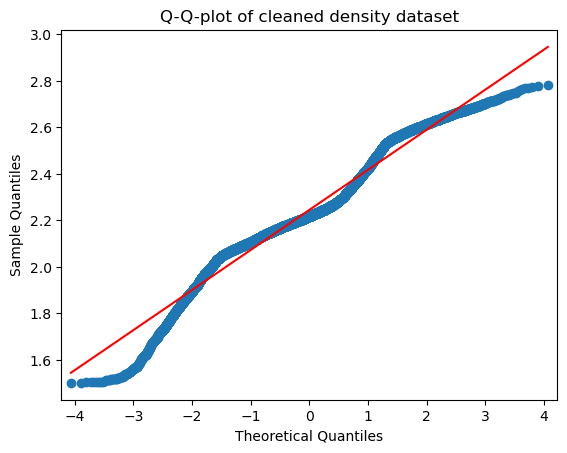

In [81]:
#Q-Q plot to visualise the distribution of the cleaned density data set
fig4 = sm.qqplot(dens_fc,line = 's')
plt.title('Q-Q-plot of cleaned density dataset')

### 2.4.2 Distribution histogram of the litho groups of the magnetic susceptibility log

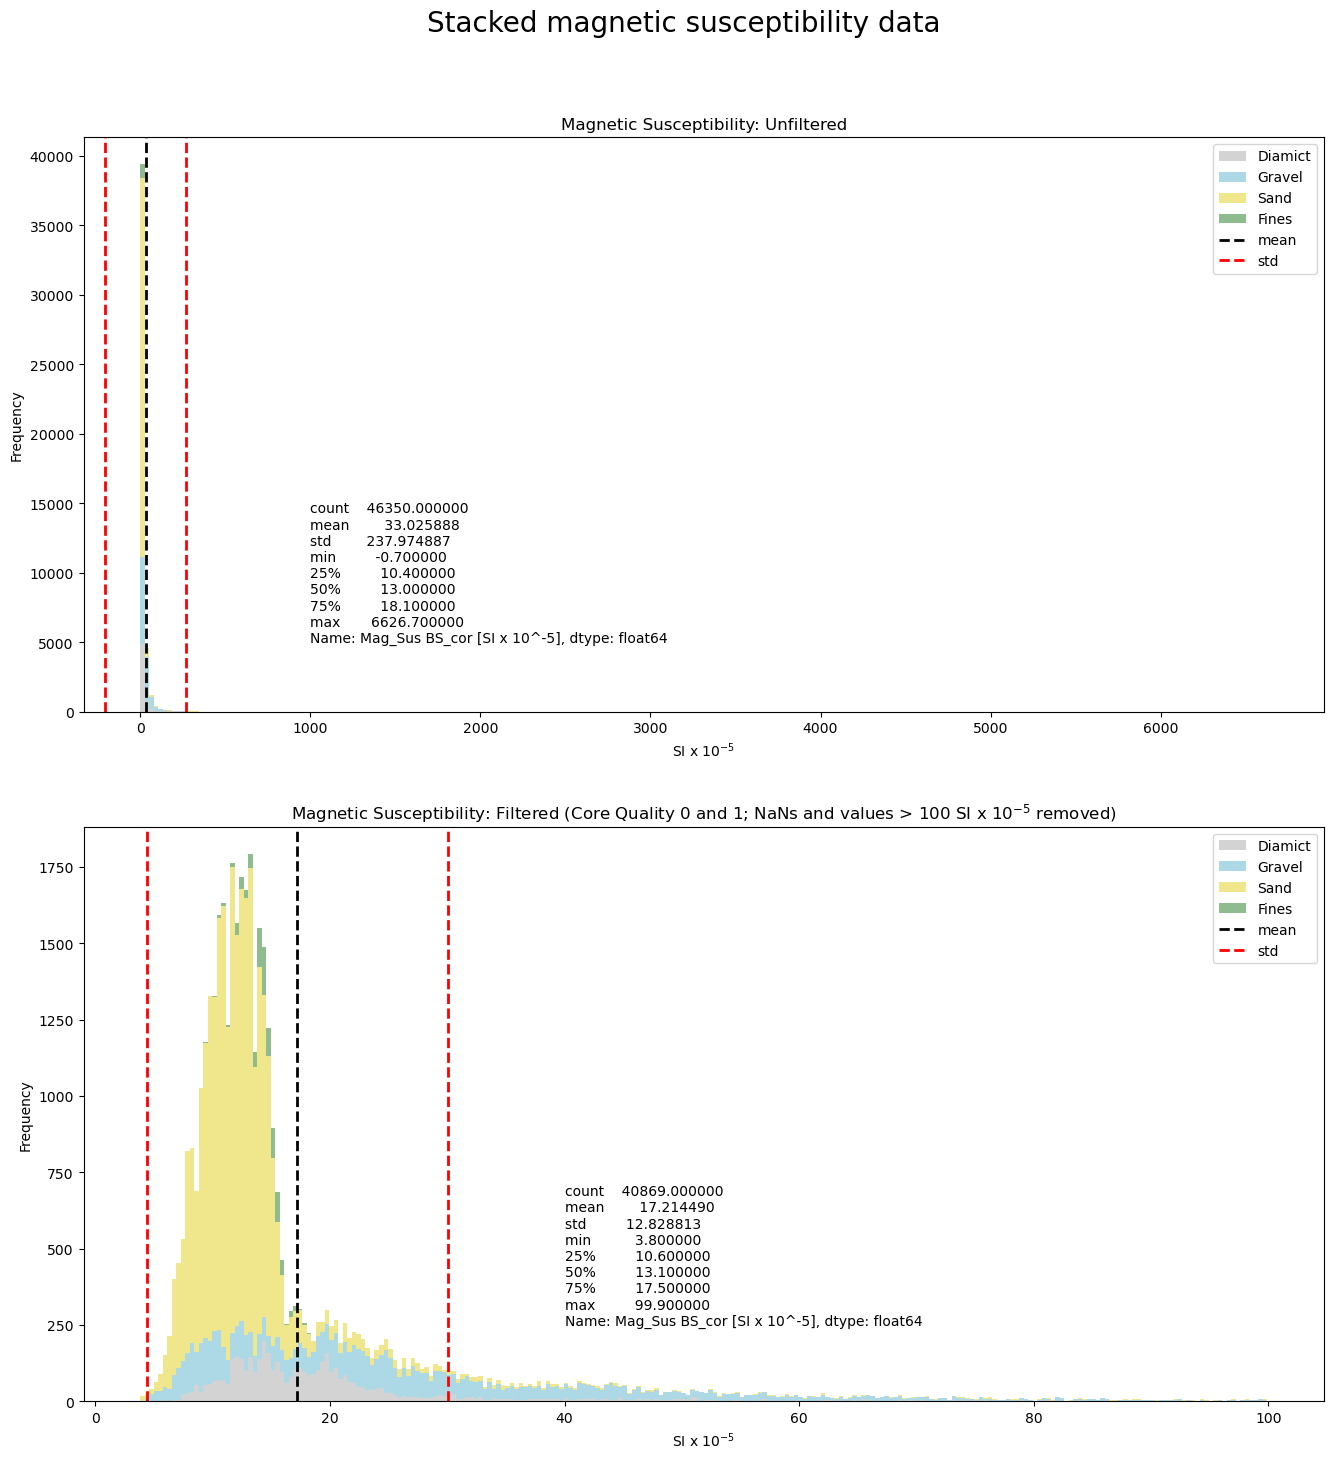

In [83]:
# Stacked histograms of the magnetic susceptibility datasets of the four main litho groups (Diamicts,Gravel, Sand, and Fines),
# with impact of filters and cleanup (plot 0 = uncleand, plot 1 = filtered, >100 SIx10^-5 removed, core quality 
# class 0 and 1 (good to acceptable data quality, and all NaNs removed). Overall mean and std ratio and the
# corresponding normal distribution is plotted over the histograms, the summary of the complete dataset is also
# provided in the plot

colors = ['lightgray','lightblue','khaki','darkseagreen']#color list
labels = ['Diamict','Gravel','Sand','Fines']#list of labels for subsets of histograms

#Setting up the supplots
fig5, ax = plt.subplots(2,1, figsize=(16,16))
fig5.suptitle('Stacked magnetic susceptibility data',fontsize=20) 
#Setting the position of the title
fig5.subplots_adjust(top=0.9)

#histogram
ax[0].hist(magsus_values_stacked_hist_uf, bins=250,fill=True,histtype='bar', stacked=True,color=colors, label=labels)
ax[1].hist(magsus_values_stacked_hist_fc, bins=250, fill=True,histtype='bar',stacked=True, color=colors, label=labels)

#plot of the mean
ax[0].axvline(magsus_uf.mean(), ls = '--',lw=2, color='k',label = 'mean')
ax[1].axvline(magsus_fc.mean(), ls = '--',lw=2, color='k',label = 'mean')

#mean + std
ax[0].axvline(magsus_uf.mean() + magsus_uf.std(), ls = '--',lw=2, color='r',label = 'std')
ax[1].axvline(magsus_fc.mean() + magsus_fc.std(), ls = '--',lw=2, color='r',label = 'std')

#mean - std
ax[0].axvline(magsus_uf.mean() - magsus_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(magsus_fc.mean() - magsus_fc.std(),ls = '--',lw=2, color='r')

#plot title
ax[0].set_title('Magnetic Susceptibility: Unfiltered')
ax[1].set_title('Magnetic Susceptibility: Filtered (Core Quality 0 and 1; NaNs and values > 100 SI x 10$^{-5}$ removed)')

#x-axis label
ax[0].set_xlabel('SI x 10$^{-5}$')
ax[1].set_xlabel('SI x 10$^{-5}$')

#y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# plots statistic overview of used data
ax[0].text (1000,5000,f'{magsus_uf.describe()}')
ax[1].text (40,250,f'{magsus_fc.describe()}')

#legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

#### 2.4.2.1 Normal distribution test of the overall magnetic susceptibility data

In [86]:
# normality test for the cleaned overall density data set
print('p-values from the normality tests on the cleaned magnetic susceptibility data (D`Agostino-Pearson):')
alpha = 0.05
k2, p = stats.normaltest(magsus_fc) # D Agostino-Pearson
print('%10s %1.4f ' % ('P-value:',p)) # printing the values
if p < alpha:
    print("The data does not follow a normal distribution")
else:
    print("The data follows a normal distribution")

p-values from the normality tests on the cleaned magnetic susceptibility data (D`Agostino-Pearson):
  P-value: 0.0000 
The data does not follow a normal distribution


#### 2.4.2.2  Q-Q plot of the overall magnetic susceptibility data distribution

Text(0.5, 1.0, 'Q-Q-plot of cleaned magnetic susceptibility dataset')

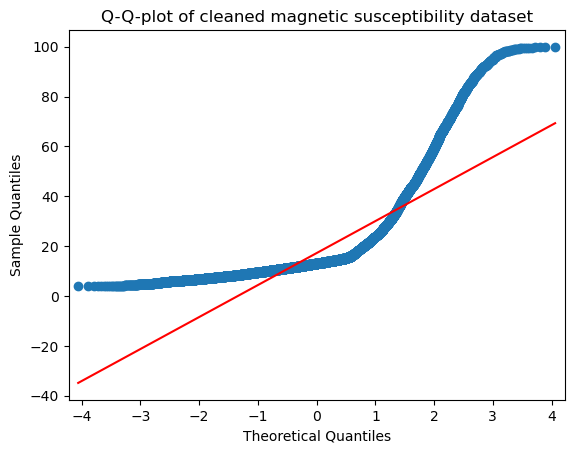

In [85]:
#Q-Q plot to visualise the distribution of the cleaned density data set
fig6 = sm.qqplot(magsus_fc,line = 's')
plt.title('Q-Q-plot of cleaned magnetic susceptibility dataset')

### 2.4.3 Distribution histogram of the litho groups of the natural gamma radiation log

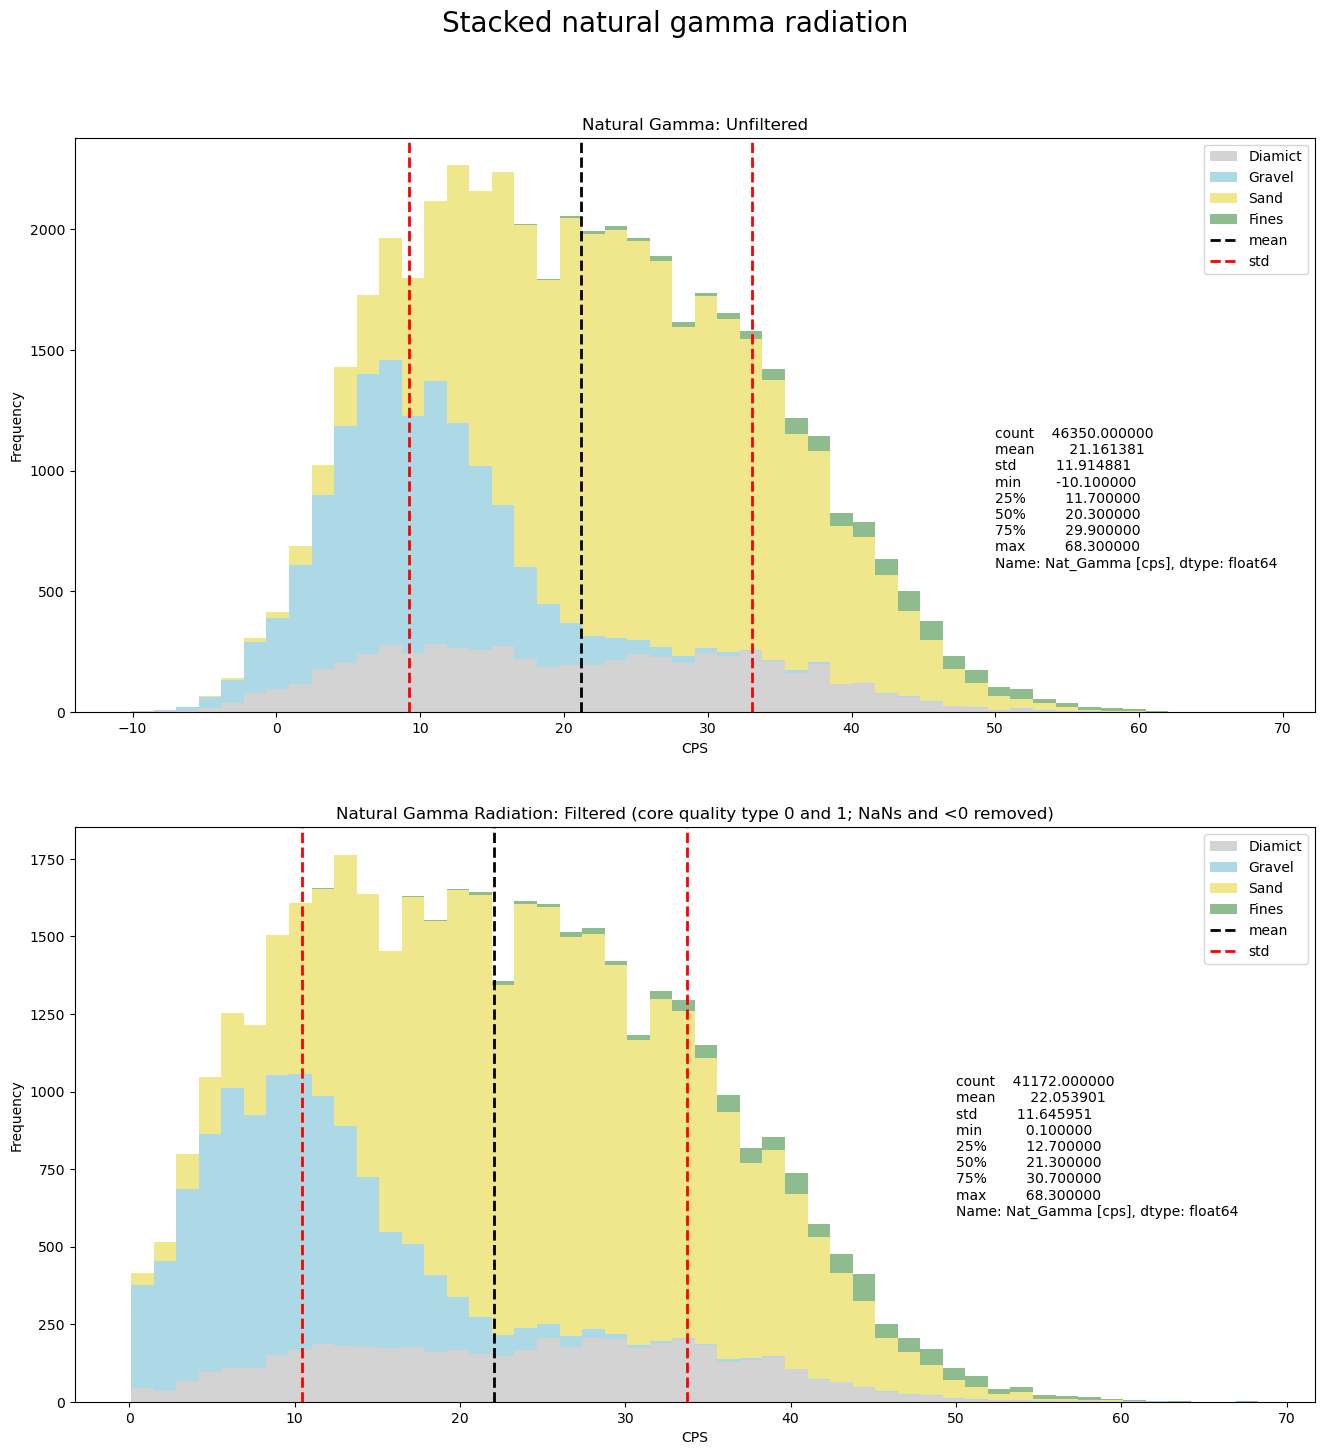

In [87]:
# Stacked histograms of the natural gamma datasets of the four main litho groups (Diamicts, Gravel, Sand, and Fines),
# with impact of filters and cleaning up (plot 0 = uncleand, plot 1 = filtered, <0 removed, quality clas 0 and 1 (good to 
# acceptable  data quality, and all NaNs removed)). Over all mean and std ratio is  plotted over the histograms,
# the summary of the complete dataset is also provided in the plot

colors = ['lightgray','lightblue','khaki','darkseagreen']#color list
labels = ['Diamict','Gravel','Sand','Fines']#list of labels for subsets of histograms

#Setting up the supplots
fig7, ax = plt.subplots(2,1, figsize=(16,16))
fig7.suptitle('Stacked natural gamma radiation',fontsize=20) 
#Setting the position of the title
fig7.subplots_adjust(top=0.9)

#histogram
ax[0].hist(natgamma_values_stacked_hist_uf, bins=50,fill=True,histtype='bar', stacked=True,color=colors, label=labels)
ax[1].hist(natgamma_values_stacked_hist_fc, bins=50, fill=True,histtype='bar',stacked=True,color=colors, label=labels)

#plot of the mean
ax[0].axvline(natgamma_uf.mean(), ls = '--',lw=2, color='k',label = 'mean')#mean
ax[1].axvline(natgamma_fc.mean(), ls = '--',lw=2, color='k',label = 'mean')

#mean + std
ax[0].axvline(natgamma_uf.mean() + natgamma_uf.std(), ls = '--',lw=2, color='r',label = 'std')
ax[1].axvline(natgamma_fc.mean() + natgamma_fc.std(), ls = '--',lw=2, color='r',label = 'std')

#mean - std
ax[0].axvline(natgamma_uf.mean() - natgamma_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(natgamma_fc.mean() - natgamma_fc.std(),ls = '--',lw=2, color='r')

#plot title
ax[0].set_title('Natural Gamma: Unfiltered')
ax[1].set_title('Natural Gamma Radiation: Filtered (core quality type 0 and 1; NaNs and <0 removed)')

#x-axis label
ax[0].set_xlabel('CPS')
ax[1].set_xlabel('CPS')

#y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# plots statistic overview of used data
ax[0].text (50,600,f'{natgamma_uf.describe()}')
ax[1].text (50,600,f'{natgamma_fc.describe()}')

#legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

#### 2.4.3.1 Normal distribution test of the overall natural gamma radiation data

In [88]:
#normaleti test for the cleand overal density data set
print('p-values from the normality tests on the cleand natgamma data (D`Agostino-Pearson):')
alpha = 0.05
k2, p = stats.normaltest(natgamma_fc) # D Agostino-Pearson
print('%10s %1.4f ' % ('P-value:',p)) # printing the values
if p < alpha:
    print("The data does not follow a normal distribution")
else:
    print("The data follows a normal distribution")

p-values from the normality tests on the cleand natgamma data (D`Agostino-Pearson):
  P-value: 0.0000 
The data does not follow a normal distribution


#### 2.4.3.2  Q-Q plot of the overall natural gamma radiation data distribution

Text(0.5, 1.0, 'Q-Q-plot of cleaned natural gamma dataset')

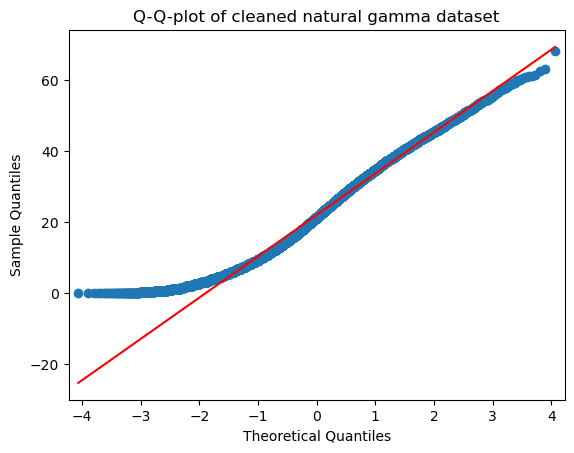

In [89]:
#Q-Q plot to visualise the distribution of the cleaned density data set
fig8 = sm.qqplot(natgamma_fc,line = 's')
plt.title('Q-Q-plot of cleaned natural gamma dataset')

## 2.5 Individual histograms of the lithoclast groups of the logs

### 2.5.1 Individual histograms of the litho groups of the density log

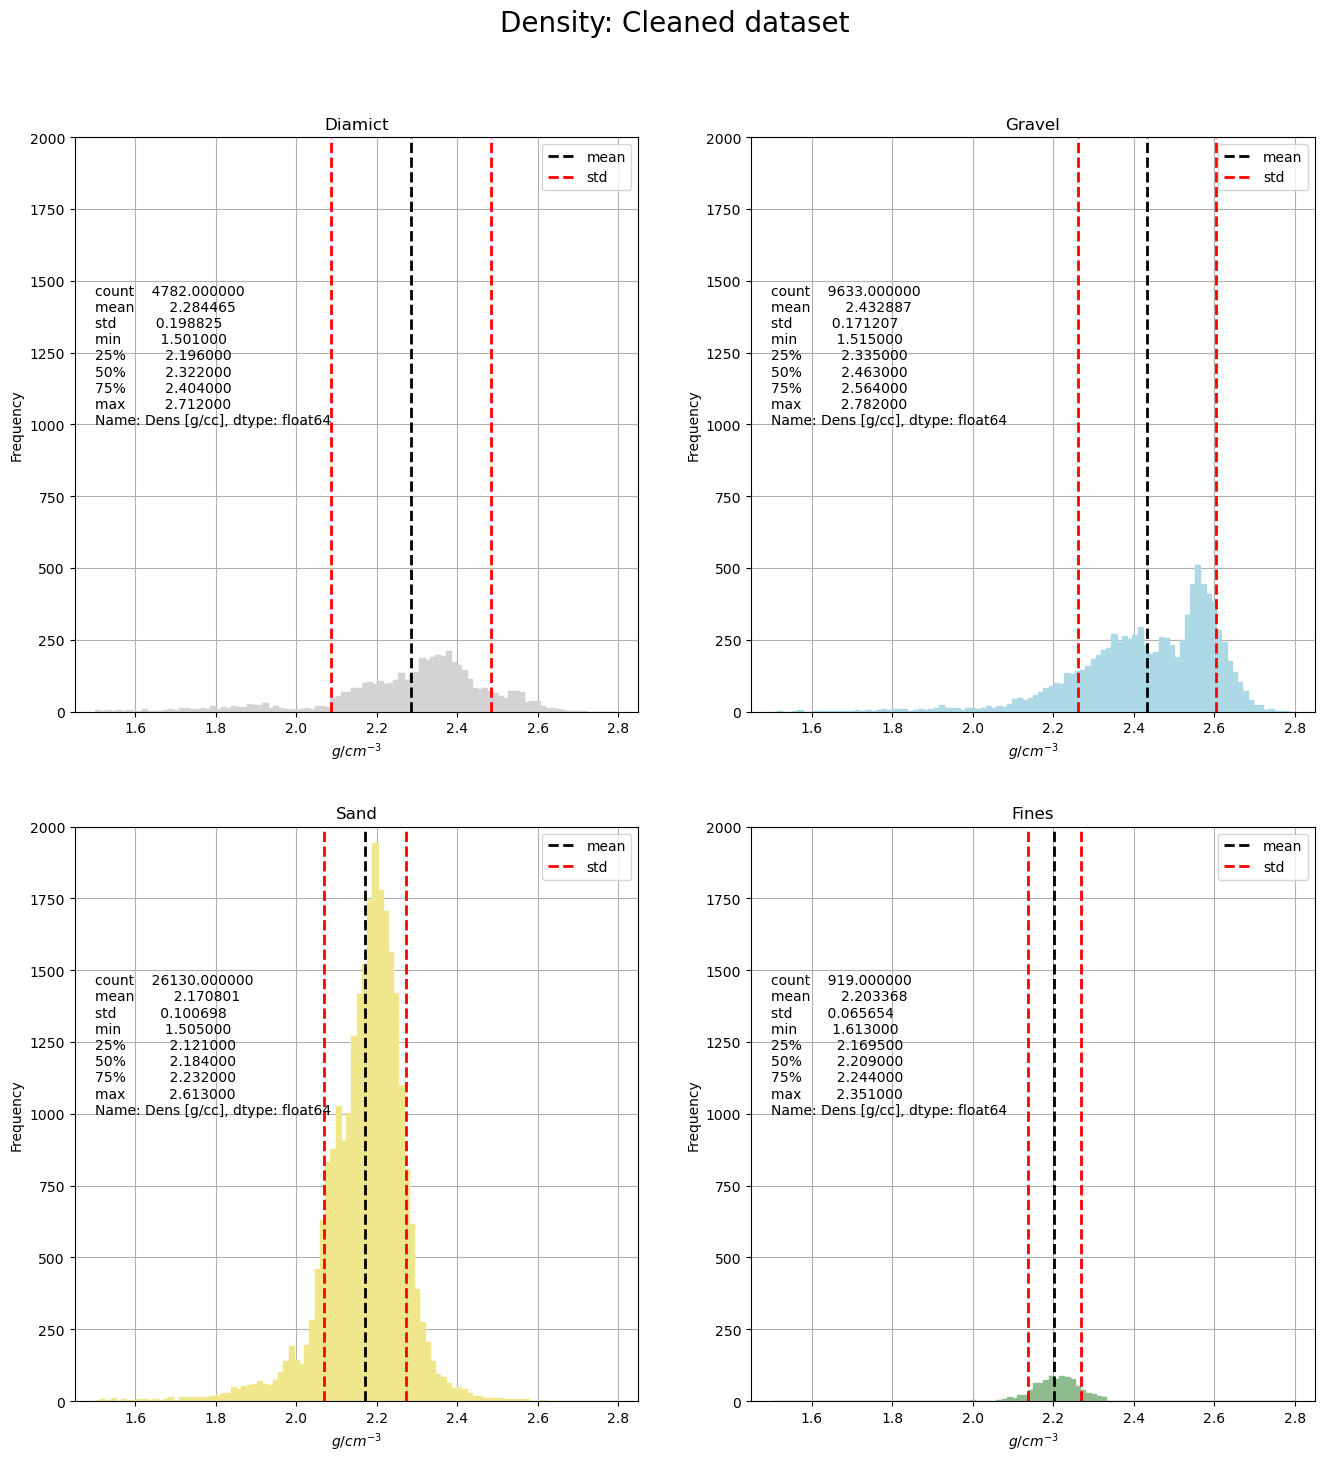

In [91]:
#individual histograms of the cleand density data of the four main litho types:
#(diamicts [0][0],gravel [0][1],Sand[1][0], and fines [1][1])
#Mean and std ration and the coresponding normal distribution is plotted over the histograms, the summary of the each sub
#data set is also provided in the plot

#Setting up the supplots
fig9, ax = plt.subplots(2,2, figsize=(16,16))
#main plot title
fig9.suptitle('Density: Cleaned dataset',fontsize=20) 
#Setting the position of the title
fig9.subplots_adjust(top=0.9)

c=0#counter
for i in range(2):#iterating over the columns
    for j in range (2):#iterating over the rows
        #histogram
        ax[i][j].hist(dens_values_stacked_hist_fc[c], bins=100,range=(1.5,2.8),fill=True,histtype='step',
                      stacked = True,color=colors[c])
        #mean
        ax[i][j].axvline(dens_values_stacked_hist_fc[c].mean(), ls = '--',lw=2, color='k',label = 'mean')
        #mean+std
        ax[i][j].axvline(dens_values_stacked_hist_fc[c].mean() + dens_values_stacked_hist_fc[c].std(),
                         ls = '--',lw=2, color='r',label = 'std')
        #mean-std
        ax[i][j].axvline(dens_values_stacked_hist_fc[c].mean() - dens_values_stacked_hist_fc[c].std(), ls = '--',
                         lw=2, color='r')        
        ax[i][j].text (1.5,1000,f'{dens_values_stacked_hist_fc[c].describe()}')#statistical summary of subdata set
        ax[i][j].set_title(labels[c]) #title          
        ax[i][j].set_ylabel('Frequency')#y-axis label
        ax[i][j].set_xlabel('$\t{g/cm}^{-3}$')#x-axis label
        ax[i][j].set_ylim([0, 2000])#y-axis limits        
        ax[i][j].set_xlim([1.45, 2.85])#x-axis limits  
        ax[i][j].grid()#grid
        ax[i][j].legend(loc="upper right")#legend
        c=c+1#ubdating counter after each iteration
        
#ploting normal distribution based on mean and std of each main lihto clas
#ax[0][0].plot(np.sort(dens_d_fc.to_numpy()),
#              scipy.stats.norm.pdf(np.sort(dens_d_fc.to_numpy()),dens_d_fc.mean(),dens_d_fc.std()),
#              '-k', label = 'normal dist')        

#### 2.5.1.1 Normality test of the individual density data sets

In [93]:
#calculating the p-values of the normality test (D`Agostino-Pearson) of the density data for each main litho clas
print('p-values from the normality tests on the density data of the four main lithology clases (D`Agostino-Pearson):')
dens_p_values = np.zeros(len(dens_values_stacked_hist_fc))#preloacting the p values
for i in range(len(dens_values_stacked_hist_fc)):
    k2, p = stats.normaltest(dens_values_stacked_hist_fc[i])# D Agostino-Pearson test, p = p-values, k2-> chi^2
    dens_p_values[i] = p#adding the p-value to the list
    print('%10s %1.4f ' % (labels[i],p))#printing the values

p-values from the normality tests on the density data of the four main lithology clases (D`Agostino-Pearson):
   Diamict 0.0000 
    Gravel 0.0000 
      Sand 0.0000 
     Fines 0.0000 


#### 2.5.1.2  Q-Q plot of the individual density data sets

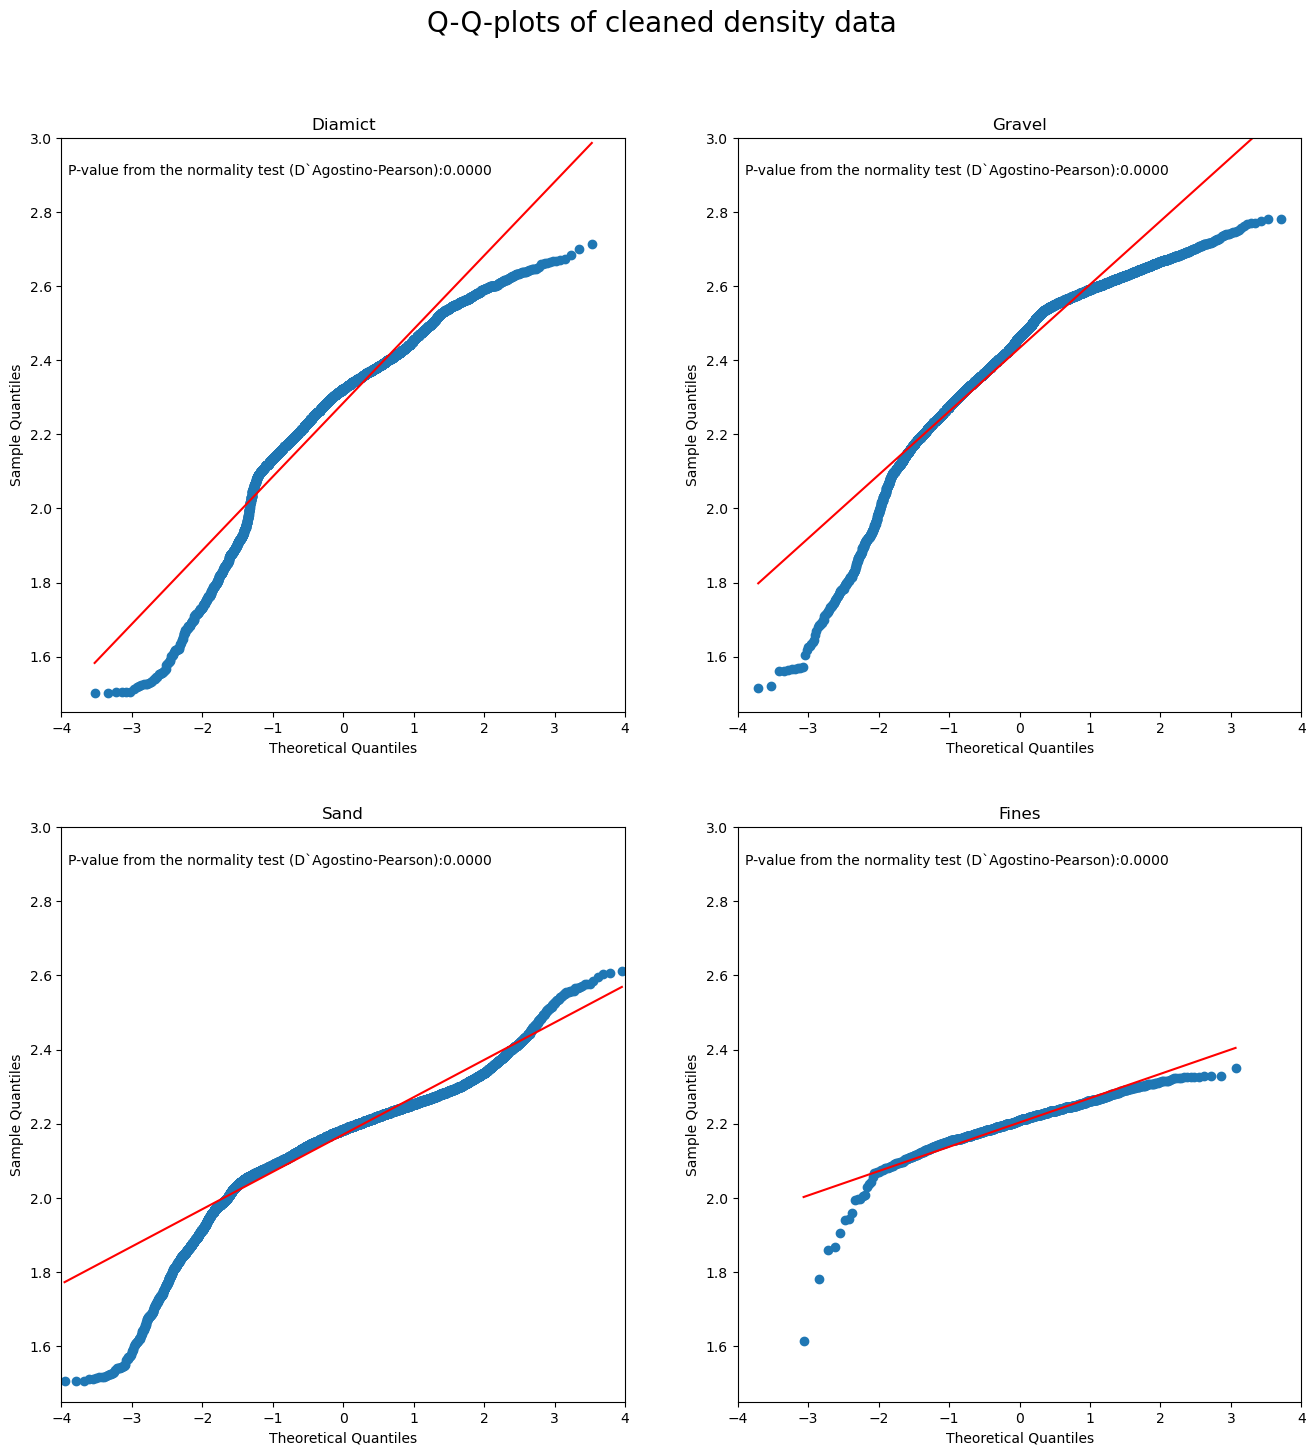

In [96]:
#creatiing the qq plots of density data the four main litho types:
#(diamicts [0][0],gravel [0][1],Sand[1][0], and fines [1][1])

#Setting up the supplots
fig10, ax = plt.subplots(2,2, figsize=(16,16))
fig10.suptitle('Q-Q-plots of cleaned density data',fontsize=20) 
#Setting the position of the title
fig10.subplots_adjust(top=0.9)

#creatiing the qq plots 
c=0#counter for list index for needed input
for i in range (2):#loops over column index
    for j in range(2):#loops over the row indexes
        fig10 = sm.qqplot(dens_values_stacked_hist_fc[c],line = 's', ax= ax[i][j])#q-qplot
        ax[i][j].set_title(labels[c])#titel
        ax[i][j].set_ylim([1.45, 3])#y-axis limits
        ax[i][j].set_xlim([-4,4])#x-xaxis limits
        #plots the results of the D`Agostino-Pearson test
        ax[i][j].text (-3.9,2.9,f'P-value from the normality test (D`Agostino-Pearson):{dens_p_values[c]:.4f}')
        c=c+1#ubdates counter after each iteration 

#### 2.5.1.3  Kruskal-Wallis-test of the four sub data sets of the density log

In [97]:
#kruskal test of the four supsets of the density data
dens_stast, dens_p = stats.kruskal(dens_values_stacked_hist_fc[0],dens_values_stacked_hist_fc[1],
                                   dens_values_stacked_hist_fc[2],dens_values_stacked_hist_fc[3])
print(f'stats: {dens_stast:.4f}',f'p-value kruskal: {dens_p:.4f}' )

stats: 16010.2519 p-value kruskal: 0.0000


#### 2.5.1.4  Mann-Whitney-U-test of the pair-wise comparison of the density sub data sets

In [138]:
#comparsion of each combination of the subdata sets of the nat density in a Mann-Whitneyneyu-test
#prelocating the later produced data
p_value_dens = np.zeros(len(dens_values_stacked_hist_fc)**2)#p-value
stats_dens = np.zeros(len(dens_values_stacked_hist_fc)**2)#statistics
compe_litho_dens = np.chararray((len(dens_values_stacked_hist_fc)**2),itemsize=3, unicode=True)#compearsion labels
x = 0#counter
#for-loop to iterate each lithotype with each lithotype, to produce all possible combinations (n^2),
#compearsion with tis self should be 1 (as control)
for i in range(len(dens_values_stacked_hist_fc)):#first loop
    for j in range(len(dens_values_stacked_hist_fc)):#second loop
        #mannwhitneyu-test
        stat, p = stats.mannwhitneyu(dens_values_stacked_hist_fc[i],dens_values_stacked_hist_fc[j], alternative='two-sided')
        p_value_dens[x] = p#saving the p-value
        stats_dens[x] = stat#saving the stats
        compe_litho_dens[x] = labels[i] +'-'+labels[j]#saving the combination of the compared elements
        #prints the output after each iteration
        print(f'p-value Mann-Whitney: {p:.4f}',f'stats: {stat:.4f}',f'compearsion: {labels[i]}-{labels[j]}')
        x =x+1#updates counter after each iteration

p-value Mann-Whitney: 1.0000 stats: 11433762.0000 compearsion: Diamict-Diamict
p-value Mann-Whitney: 0.0000 stats: 12322264.0000 compearsion: Diamict-Gravel
p-value Mann-Whitney: 0.0000 stats: 94877068.5000 compearsion: Diamict-Sand
p-value Mann-Whitney: 0.0000 stats: 3198719.0000 compearsion: Diamict-Fines
p-value Mann-Whitney: 0.0000 stats: 33742742.0000 compearsion: Gravel-Diamict
p-value Mann-Whitney: 1.0000 stats: 46397344.5000 compearsion: Gravel-Gravel
p-value Mann-Whitney: 0.0000 stats: 229586797.5000 compearsion: Gravel-Sand
p-value Mann-Whitney: 0.0000 stats: 7977577.0000 compearsion: Gravel-Fines
p-value Mann-Whitney: 0.0000 stats: 30076591.5000 compearsion: Sand-Diamict
p-value Mann-Whitney: 0.0000 stats: 22123492.5000 compearsion: Sand-Gravel
p-value Mann-Whitney: 1.0000 stats: 341388450.0000 compearsion: Sand-Sand
p-value Mann-Whitney: 0.0000 stats: 9377135.0000 compearsion: Sand-Fines
p-value Mann-Whitney: 0.0000 stats: 1195939.0000 compearsion: Fines-Diamict
p-value Man

### 2.5.2 Individual histograms of the litho groups of the Magnetic Susceptibility log

#### 2.5.2.1 Normal distribution test of the individual Magnetic Susceptibility data sets

In [101]:
#calculating the p-values of the normality test (D`Agostino-Pearson) of the density data for each main litho clas
print('p-values of the normality tests on the magnetic susceptibility data of the four main lithology clases (D`Agostino-Pearson):')
magsus_p_values = np.zeros(len(magsus_values_stacked_hist_fc))#preloacting the p values
#looping over each sub-data set to doe the D`Agostino-Pearson test of each sub-data set
for i in range(len(magsus_values_stacked_hist_fc)):
    k2, p = stats.normaltest(magsus_values_stacked_hist_fc[i])# D Agostino-Pearson test, p = p-values, k2-> chi^2
    magsus_p_values[i] = p#adding the p-value to the list
    print('%10s %1.4f ' % (labels[i],p))#printing the values

p-values of the normality tests on the magnetic susceptibility data of the four main lithology clases (D`Agostino-Pearson):
   Diamict 0.0000 
    Gravel 0.0000 
      Sand 0.0000 
     Fines 0.0000 


#### 2.5.1.2  Q-Q plot of the individual Magnetic Susceptibility data sets

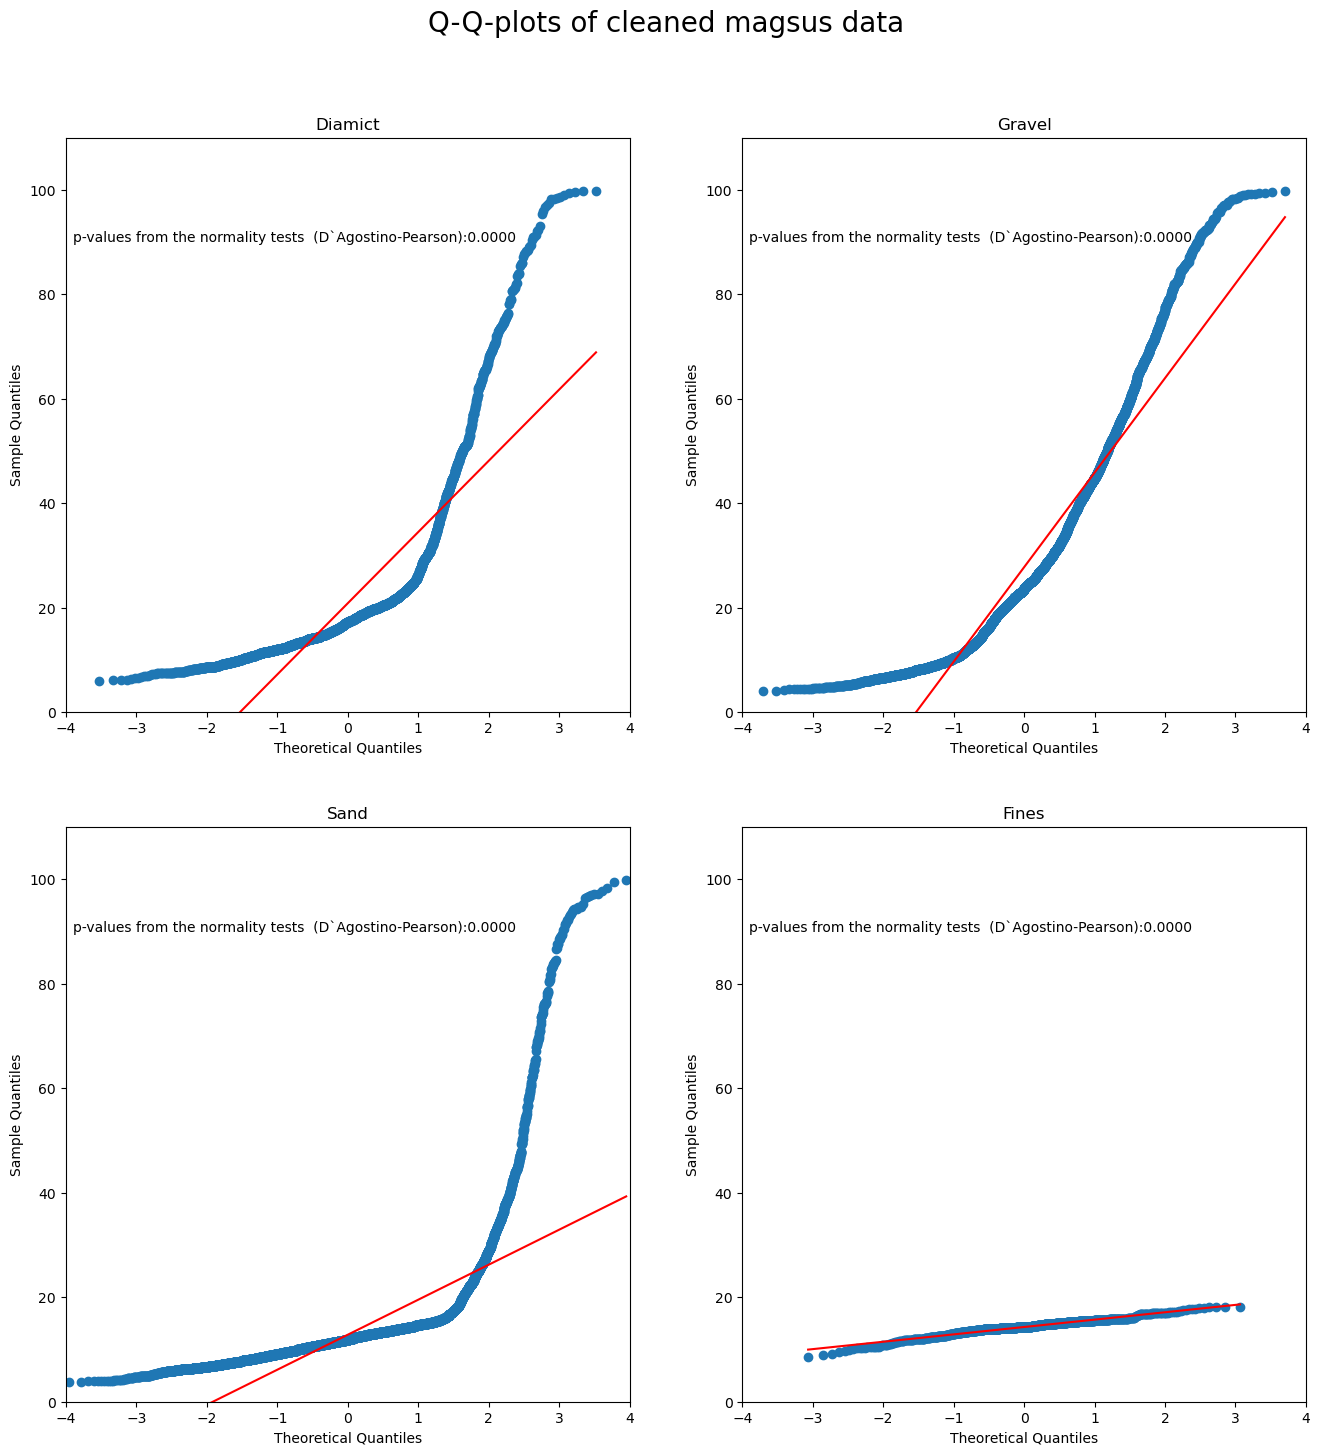

In [102]:
#creatiing the qq plots of magsus data the four main litho types:
#(diamicts [0][0],gravel [0][1],Sand[1][0], and fines [1][1])

#Setting up the supplots
fig12, ax = plt.subplots(2,2, figsize=(16,16))
fig12.suptitle('Q-Q-plots of cleaned magsus data',fontsize=20) 
#Setting the position of the title
fig12.subplots_adjust(top=0.9)

#creatiing the qq plots 
c=0#counter for list index for needed input
for i in range (2):#loops over columne index
    for j in range(2):#loops over the row indexes
        fig10 = sm.qqplot(magsus_values_stacked_hist_fc[c],line = 's', ax= ax[i][j])#q-qplot
        ax[i][j].set_title(labels[c])#title
        ax[i][j].set_ylim([0, 110])#y-axis limits
        ax[i][j].set_xlim([-4,4])#x-xaxis limits
        #plots the results of the D`Agostino-Pearson test
        ax[i][j].text (-3.9,90,f'p-values from the normality tests  (D`Agostino-Pearson):{magsus_p_values[c]:.4f}')
        c=c+1#ubdates counter after each iteration

#### 2.5.2.3  Kruskal-Wallis-test of the four sub data sets of the Magnetic Susceptibility log

In [107]:
#kruskal test of the four supsets of the magsus data
magsus_stast, magsus_p = stats.kruskal(magsus_values_stacked_hist_fc[0],magsus_values_stacked_hist_fc[1],
                                      magsus_values_stacked_hist_fc[2],magsus_values_stacked_hist_fc[3])
print(f'stats: {magsus_stast:.4f}',f'p-value kruskal: {magsus_p:.4f}' )

stats: 9576.2385 p-value kruskal: 0.0000


#### 2.5.2.4  Mann-Whitney-U-test of the pair-wise comparison of the Magnetic Susceptibility sub data sets

In [114]:
#comparsion of each combination of the subdata sets of the magsus data in a Mann-Whitneyneyu-test
#prelocating the later produced data
p_value_magsus = np.zeros(len(magsus_values_stacked_hist_fc)**2)#p-value
stats_magsus = np.zeros(len(magsus_values_stacked_hist_fc)**2)#statistics
compe_litho_magsus = np.chararray((len(magsus_values_stacked_hist_fc)**2),itemsize=25, unicode=True)#compearsion labels
x = 0#counter
#for-loop to iterate each lithotype with each lithotype, to produce all possible combinations (n^2),
#compearsion with tis self should be 1 (as control)
for i in range(len(magsus_values_stacked_hist_fc)):#first loop
    for j in range(len(magsus_values_stacked_hist_fc)):#second loop
        #mannwhitneyu-test
        stat, p = stats.mannwhitneyu(magsus_values_stacked_hist_fc[i],magsus_values_stacked_hist_fc[j],
                                     alternative='two-sided')
        p_value_magsus[x] = p#saving the p-value
        stats_magsus[x] = stat#saving the stats
        compe_litho_magsus[x] = labels[i] +'-'+labels[j]#saving the combination of the compared elements
        #prints the output after each iteration
        print(f'p-value Mann-Whitney:{p:.4f}',f'stats:{stat:.4f}',f'{labels[i]}-{labels[j]}')
        x =x+1#updates counter after each iteration

p-value Mann-Whitney:1.0000 stats:11068512.5000 Diamict-Diamict
p-value Mann-Whitney:0.0000 stats:16852529.0000 Diamict-Gravel
p-value Mann-Whitney:0.0000 stats:96802283.5000 Diamict-Sand
p-value Mann-Whitney:0.0000 stats:2924317.0000 Diamict-Fines
p-value Mann-Whitney:0.0000 stats:27299191.0000 Gravel-Diamict
p-value Mann-Whitney:1.0000 stats:44029728.0000 Gravel-Gravel
p-value Mann-Whitney:0.0000 stats:190529630.5000 Gravel-Sand
p-value Mann-Whitney:0.0000 stats:6333335.5000 Gravel-Fines
p-value Mann-Whitney:0.0000 stats:24873721.5000 Sand-Diamict
p-value Mann-Whitney:0.0000 stats:52149993.5000 Sand-Gravel
p-value Mann-Whitney:1.0000 stats:334395660.5000 Sand-Sand
p-value Mann-Whitney:0.0000 stats:5248698.5000 Sand-Fines
p-value Mann-Whitney:0.0000 stats:1399578.0000 Fines-Diamict
p-value Mann-Whitney:0.0000 stats:2290560.5000 Fines-Gravel
p-value Mann-Whitney:0.0000 stats:18517560.5000 Fines-Sand
p-value Mann-Whitney:1.0000 stats:422280.5000 Fines-Fines


### 2.5.3 Individual histograms of the litho groups of the natural gamma radiation log

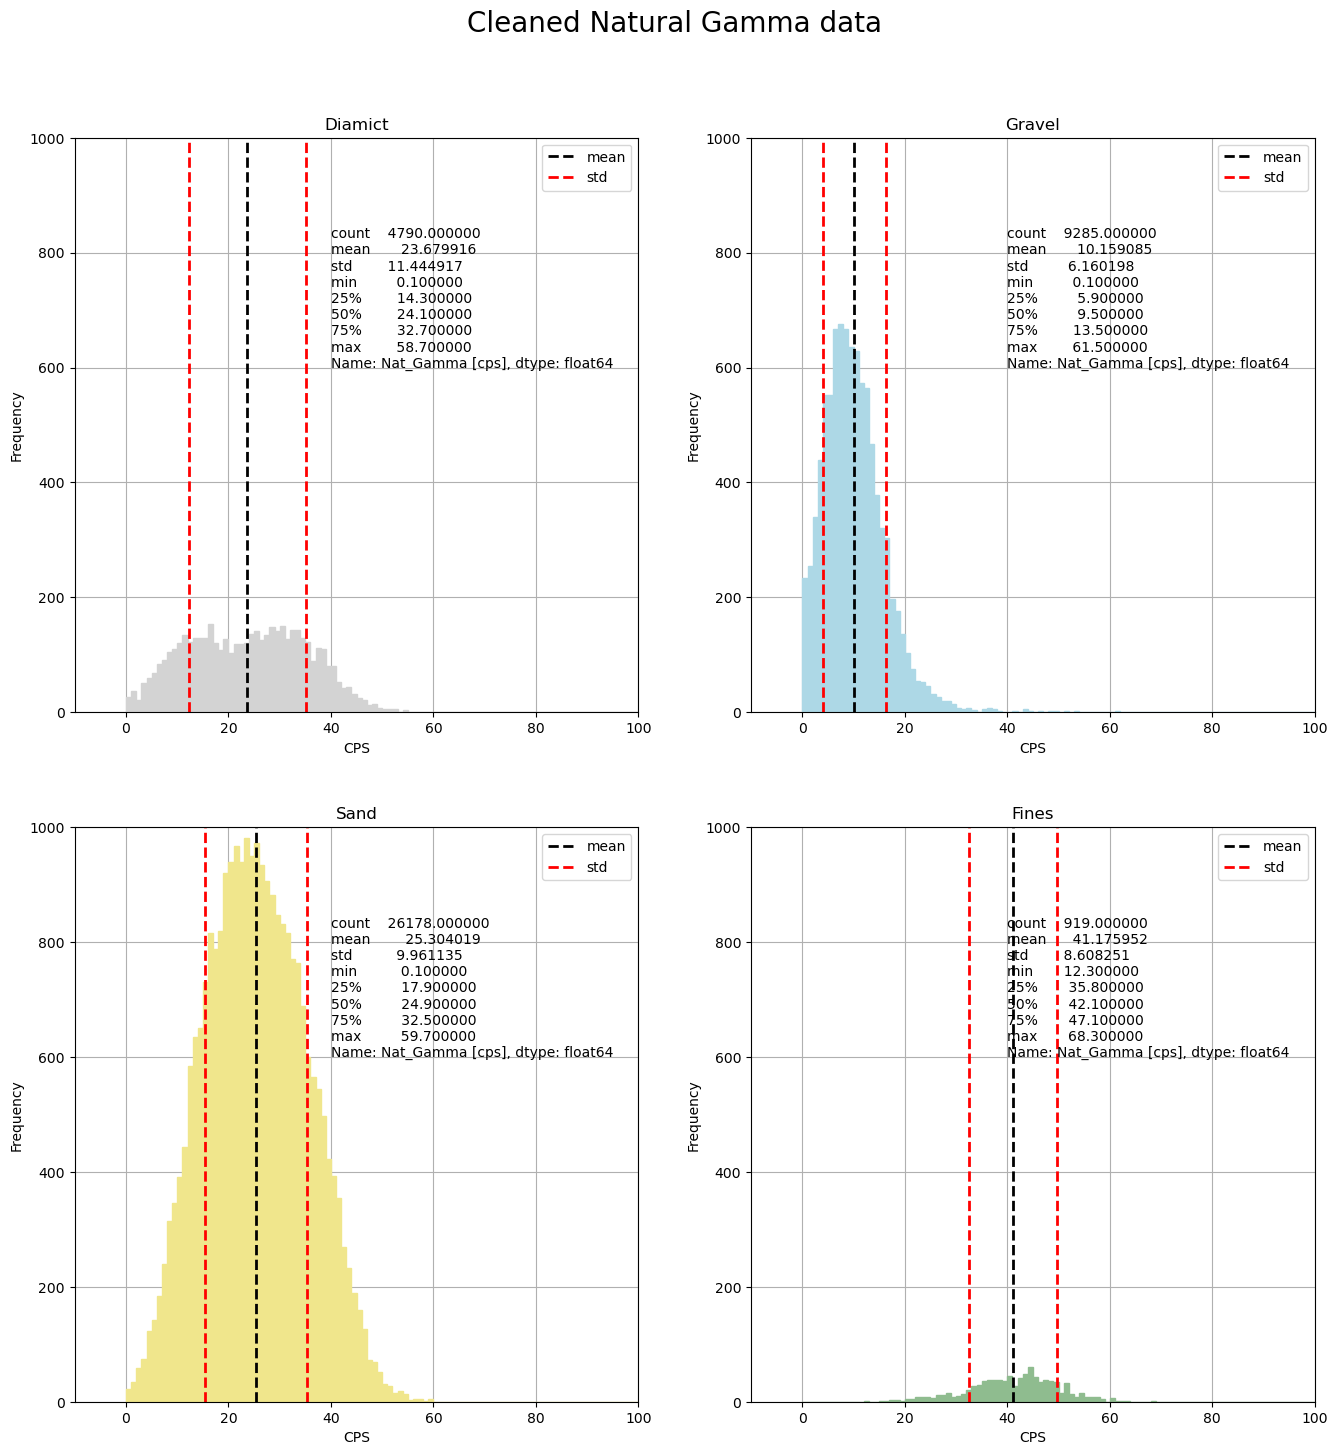

In [109]:
#individual histograms of the cleand natgamma data of the four main litho types:
#(diamicts [0][0],gravel [0][1],Sand[1][0], and fines [1][1])
#Mean and std ration and the coresponding normal distribution is plotted over the histograms, the summary of the each sub
#data set is also provided in the plot

#Setting up the supplots
fig13, ax = plt.subplots(2,2, figsize=(16,16))
#main plot title
fig13.suptitle('Cleaned Natural Gamma data',fontsize=20) 
#Setting the position of the title
fig13.subplots_adjust(top=0.9)

c=0#counter for list index
for i in range(2):#iterating over the columns
    for j in range (2):#iterating over the rows
        #plots
        #histogram
        ax[i][j].hist(natgamma_values_stacked_hist_fc[c], bins=100,range=(0,100),fill=True,histtype='step',
                      stacked = True,color=colors[c])
        #mean
        ax[i][j].axvline(natgamma_values_stacked_hist_fc[c].mean(), ls = '--',lw=2, color='k',label = 'mean')
        #mean+std
        ax[i][j].axvline(natgamma_values_stacked_hist_fc[c].mean() + natgamma_values_stacked_hist_fc[c].std(),
                         ls = '--',lw=2, color='r',label = 'std')
        #mean-std
        ax[i][j].axvline(natgamma_values_stacked_hist_fc[c].mean() - natgamma_values_stacked_hist_fc[c].std(), ls = '--',
                         lw=2, color='r')
        #Setting of plot
        ax[i][j].text (40,600,f'{natgamma_values_stacked_hist_fc[c].describe()}')#statistical summary of subdata set
        ax[i][j].set_title(labels[c])   #title     
        ax[i][j].set_ylabel('Frequency')#y-axis label
        ax[i][j].set_xlabel('CPS')#x-axis label
        ax[i][j].set_ylim([0, 1000])  #y-axis limits      
        ax[i][j].set_xlim([-10, 100])#x-axis limits  
        ax[i][j].grid()#grid
        ax[i][j].legend(loc="upper right")#legend
        c=c+1#ubdating counter after each iteration


#ploting normal distribution based on mean and std of each main lihto clas
#ax[0][0].plot(np.sort(natgamma_d_fc.to_numpy()),
              #scipy.stats.norm.pdf(np.sort(natgamma_d_fc.to_numpy()),natgamma_d_fc.mean(),natgamma_d_fc.std()),
              #'-k', label = 'normal dist')



#### 2.5.3.1 Normal distribution test of the individual natural gamma radiation data sets

In [110]:
#calculating the p-values of the normality test (D`Agostino-Pearson) of the density data for each main litho clas
print('p-values from the normality tests on the natural gamma data of the four main lithology clases (D`Agostino-Pearson):')
natgamma_p_values = np.zeros(len(natgamma_values_stacked_hist_fc))#preloacting the p values
#looping over each sub-data set to doe the D`Agostino-Pearson test of each sub-data set
for i in range(len(natgamma_values_stacked_hist_fc)):
    k2, p = stats.normaltest(natgamma_values_stacked_hist_fc[i]) # D Agostino-Pearson test, p = p-values, k2-> chi^2
    natgamma_p_values[i] = p#adding the p-value to the list
    print('%10s %1.4f ' % (labels[i],p))#printing the values

p-values from the normality tests on the natural gamma data of the four main lithology clases (D`Agostino-Pearson):
   Diamict 0.0000 
    Gravel 0.0000 
      Sand 0.0000 
     Fines 0.0003 


#### 2.5.3.2  Q-Q plot of the individual natural gamma radiation data sets

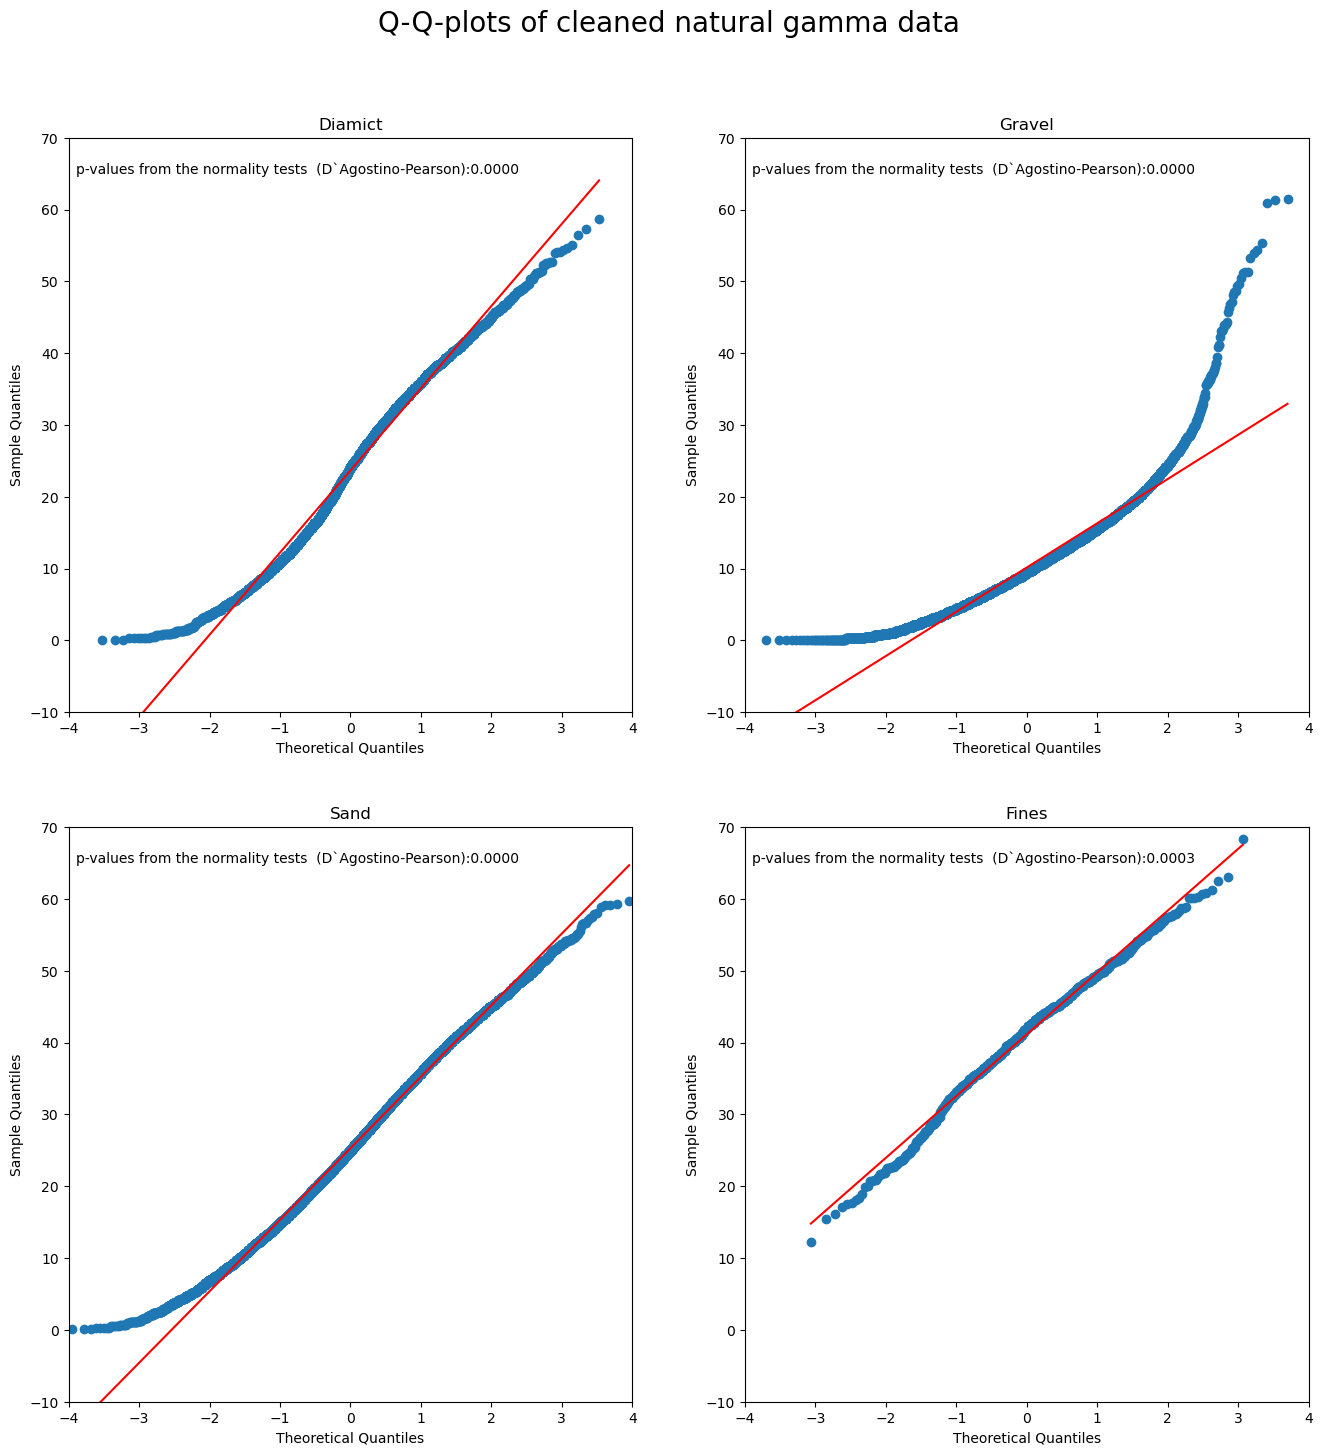

In [111]:
#creatiing the qq plots of natgamma data the four main litho types:
#(diamicts [0][0],gravel [0][1],Sand[1][0], and fines [1][1])

#Setting up the supplots
fig14, ax = plt.subplots(2,2, figsize=(16,16))
fig14.suptitle('Q-Q-plots of cleaned natural gamma data',fontsize=20) 
#Setting the position of the title
fig14.subplots_adjust(top=0.9)

#creatiing the qq plots 
c=0#counter for list index for needed input
for i in range (2):#loops over columne index
    for j in range(2):#loops over the row indexes
        fig10 = sm.qqplot(natgamma_values_stacked_hist_fc[c],line = 's', ax= ax[i][j])#q-qplot
        ax[i][j].set_title(labels[c])#title
        ax[i][j].set_ylim([-10, 70])#y-axis limits
        ax[i][j].set_xlim([-4,4])#x-xaxis limits
        #plots the results of the D`Agostino-Pearson test
        ax[i][j].text (-3.9,65,f'p-values from the normality tests  (D`Agostino-Pearson):{natgamma_p_values[c]:.4f}')
        c=c+1#ubdates counter after each iteration

#### 2.5.3.3  Kruskal-Wallis-test of the four sub data sets of the natural gamma radiation log

In [112]:
#kruskal test of the four supsets of the natural gamma radiation data
natgamma_stast, natgamma_p = stats.kruskal(natgamma_values_stacked_hist_fc[0],natgamma_values_stacked_hist_fc[1],
                                           natgamma_values_stacked_hist_fc[2],natgamma_values_stacked_hist_fc[3])
print(f'stats: {natgamma_stast:.4f}',f'p-value kruskal: {natgamma_p:.4f}' )

stats: 14837.6648 p-value kruskal: 0.0000


#### 2.5.3.4  Mann-Whitney-U-test of the pair-wise comparison of the natural gamma radiation sub data sets

In [116]:
#comparsion of each combination of the subdata sets of the natural gamma radiation data in a Mann-Whitneyneyu-test
#prelocating the later produced data
p_value_natgamma = np.zeros(len(natgamma_values_stacked_hist_fc)**2)#p-value
stats_natgamma = np.zeros(len(natgamma_values_stacked_hist_fc)**2)#statistics
compe_litho_natgamma = np.chararray((len(natgamma_values_stacked_hist_fc)**2),itemsize=25, unicode=True)#comparsion labels
x = 0#counter
#for-loop to iterate each lithotype with each lithotype, to produce all possible combinations (n^2),
#comparsion with tis self should be 1 (as control)
for i in range(len(natgamma_values_stacked_hist_fc)):#first loop
    for j in range(len(natgamma_values_stacked_hist_fc)):#second loop
        #mannwhitneyu-test
        stat, p = stats.mannwhitneyu(natgamma_values_stacked_hist_fc[i],natgamma_values_stacked_hist_fc[j], alternative='two-sided')
        p_value_natgamma[x] = p#saving the p-value
        stats_natgamma[x] = stat#saving the stats
        compe_litho_natgamma[x] = labels[i] +'-'+ labels[j]#saving the combination of the compared elements
        #prints the output after each iteration
        print(f'p-value Mann-Whitney :{p:.4f}',f'stats:{stat:.4f}',f'comparsion:{labels[i]}-{labels[j]}')
        #updates counter after each iteration
        x =x+1

p-value Mann-Whitney :1.0000 stats:11472050.0000 comparsion:Diamict-Diamict
p-value Mann-Whitney :0.0000 stats:37414486.5000 comparsion:Diamict-Gravel
p-value Mann-Whitney :0.0000 stats:57699840.0000 comparsion:Diamict-Sand
p-value Mann-Whitney :0.0000 stats:507147.0000 comparsion:Diamict-Fines
p-value Mann-Whitney :0.0000 stats:7060663.5000 comparsion:Gravel-Diamict
p-value Mann-Whitney :1.0000 stats:43105612.5000 comparsion:Gravel-Gravel
p-value Mann-Whitney :0.0000 stats:23139053.5000 comparsion:Gravel-Sand
p-value Mann-Whitney :0.0000 stats:50951.0000 comparsion:Gravel-Fines
p-value Mann-Whitney :0.0000 stats:67692780.0000 comparsion:Sand-Diamict
p-value Mann-Whitney :0.0000 stats:219923676.5000 comparsion:Sand-Gravel
p-value Mann-Whitney :1.0000 stats:342643842.0000 comparsion:Sand-Sand
p-value Mann-Whitney :0.0000 stats:2848827.0000 comparsion:Sand-Fines
p-value Mann-Whitney :0.0000 stats:3894863.0000 comparsion:Fines-Diamict
p-value Mann-Whitney :0.0000 stats:8481964.0000 compar

### 2.6 Boxplots of the sub-datasets of the logs

#### 2.6.1 Density data

Text(0, 0.5, '$\t{g/cm}^{-3}$')

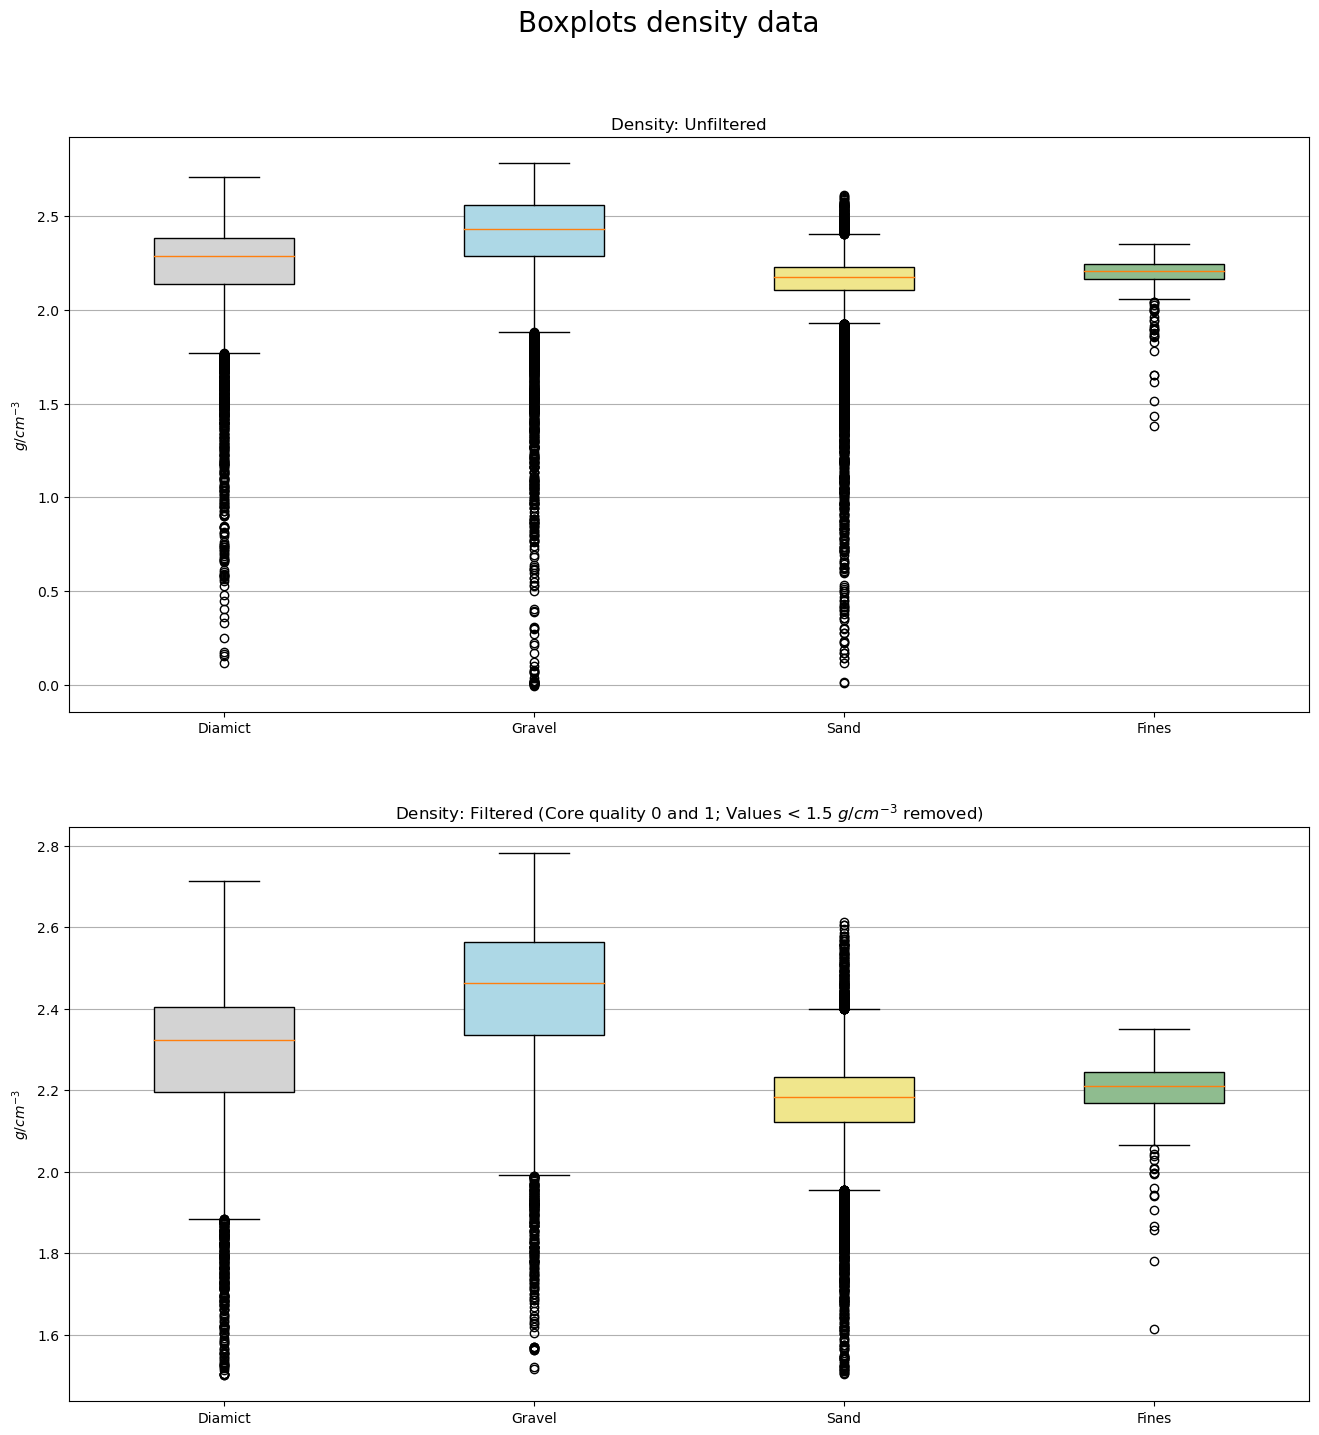

In [117]:
#removing any NaNs in the data set, otherwise no data ploted -> nan
dens_values_stacked_hist_uf
for i in range(len(dens_values_stacked_hist_uf)):#looping over the data list
    data=dens_values_stacked_hist_uf[i][~np.isnan(dens_values_stacked_hist_uf[i])]#removing NaNs by nan mask
    dens_values_stacked_hist_uf[i] = data#replacing the old data with the maske 

#bocplot
fig15, ax = plt.subplots(2,1, figsize=(16,16))
fig15.suptitle('Boxplots density data',fontsize=20) 
#Setting the position of the title
fig15.subplots_adjust(top=0.9)

#plots, asined as box 1/2 for chaning fill colors
box1 = ax[0].boxplot(dens_values_stacked_hist_uf,patch_artist=True,labels=labels)#unfiltered data
box2 = ax[1].boxplot(dens_values_stacked_hist_fc,patch_artist=True,labels=labels)#filtered data  

#chaning fill colers
#unfiltered data
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
#filtered data    
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)

#grid
ax[0].grid(axis='y')
ax[1].grid(axis='y')

#plot title
ax[0].set_title('Density: Unfiltered')
ax[1].set_title('Density: Filtered (Core quality 0 and 1; Values < 1.5 $\t{g/cm}^{-3}$ removed)')

#y-axis label
ax[0].set_ylabel('$\t{g/cm}^{-3}$')
ax[1].set_ylabel('$\t{g/cm}^{-3}$')

#### 2.6.2 Magnetic Susceptibility data

Text(0, 0.5, 'SI x 10$^{-5}$')

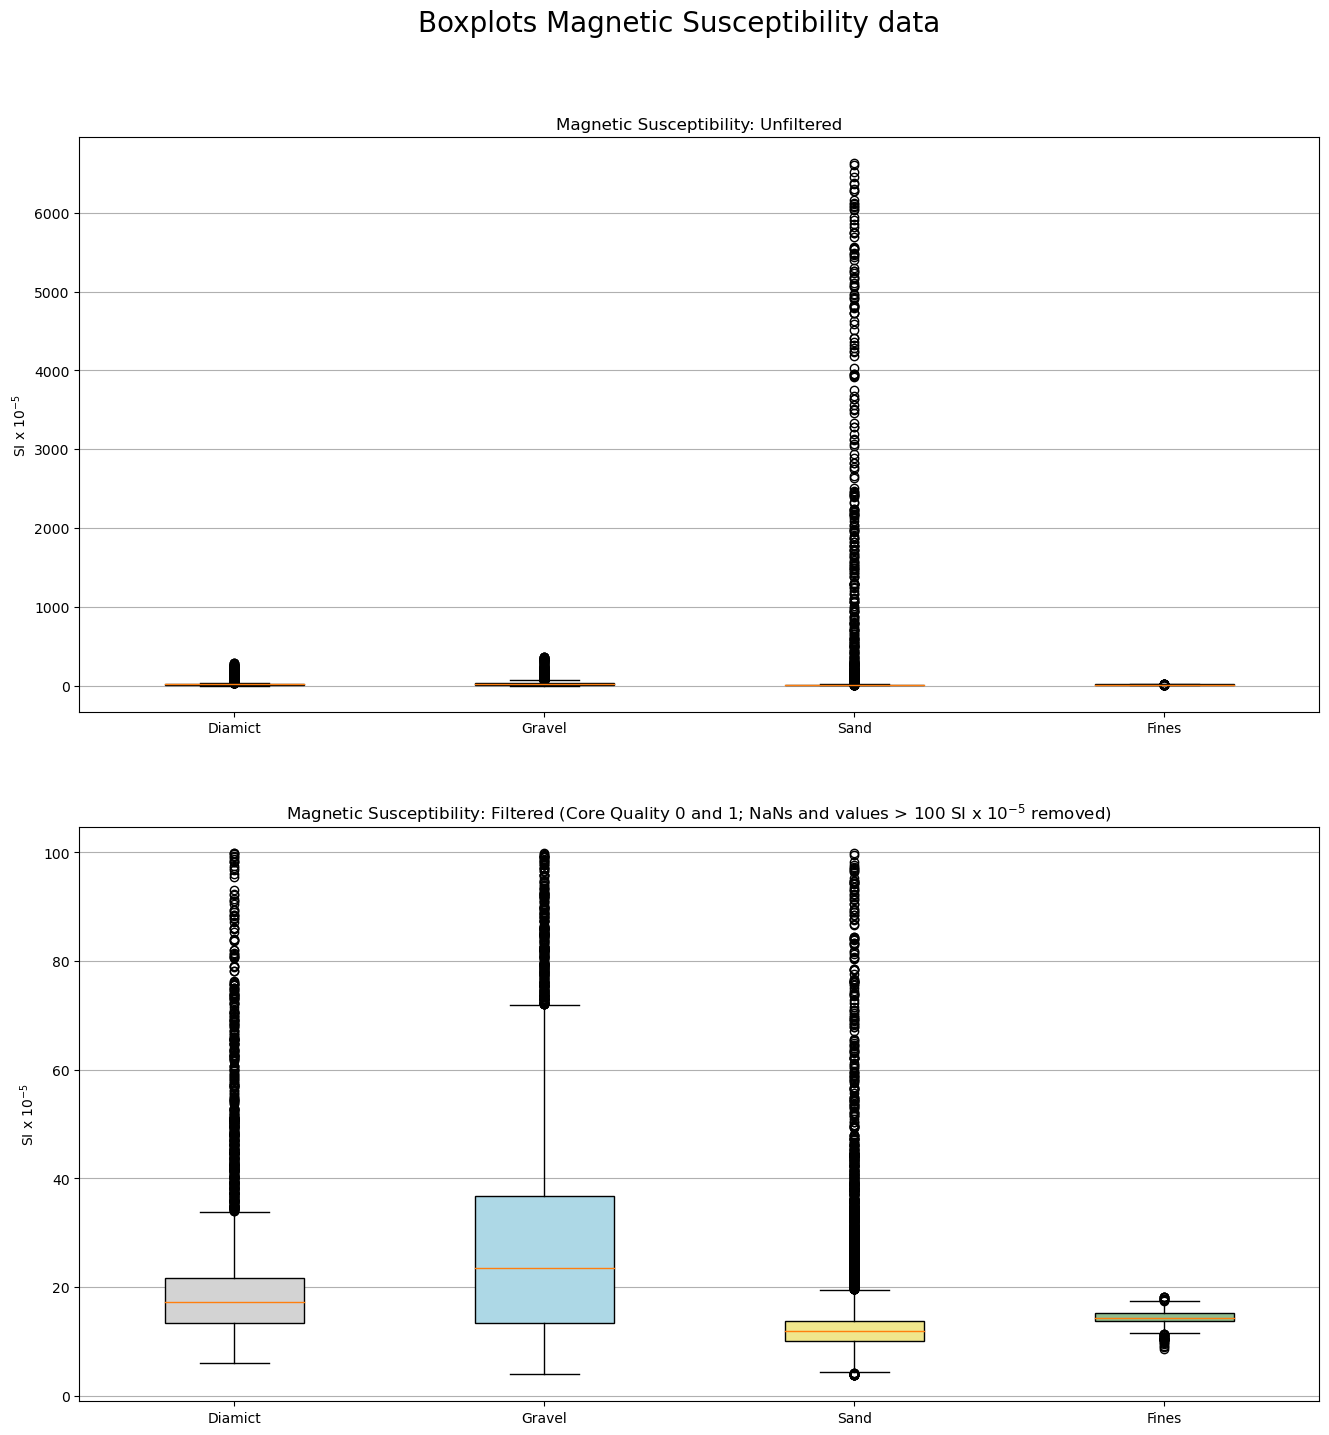

In [118]:
#removing any NaNs in the data set, otherwise no data ploted -> nan
magsus_values_stacked_hist_uf
for i in range(len(magsus_values_stacked_hist_uf)):#looping over the data list
    data=magsus_values_stacked_hist_uf[i][~np.isnan(magsus_values_stacked_hist_uf[i])]#removing NaNs by nan mask
    magsus_values_stacked_hist_uf[i] = data#replacing the old data with the maske 

fig16, ax = plt.subplots(2,1, figsize=(16,16))
fig16.suptitle('Boxplots Magnetic Susceptibility data',fontsize=20) 
#Setting the position of the title
fig16.subplots_adjust(top=0.9)

#plots, asined as box 1/2 for chaning fill colors
box1 = ax[0].boxplot(magsus_values_stacked_hist_uf,patch_artist=True,labels=labels)#unfiltered data
box2 = ax[1].boxplot(magsus_values_stacked_hist_fc,patch_artist=True,labels=labels)#filtered data 

#chaning fill colers
#unfiltered data
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
#filtered data        
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)

#grid
ax[0].grid( axis='y')
ax[1].grid( axis='y')

#plot title
ax[0].set_title('Magnetic Susceptibility: Unfiltered')
ax[1].set_title('Magnetic Susceptibility: Filtered (Core Quality 0 and 1; NaNs and values > 100 SI x 10$^{-5}$ removed)')

#y-axis label
ax[0].set_ylabel('SI x 10$^{-5}$')
ax[1].set_ylabel('SI x 10$^{-5}$')

#### 2.6.3 Natural Gamma data

Text(0, 0.5, 'CPS')

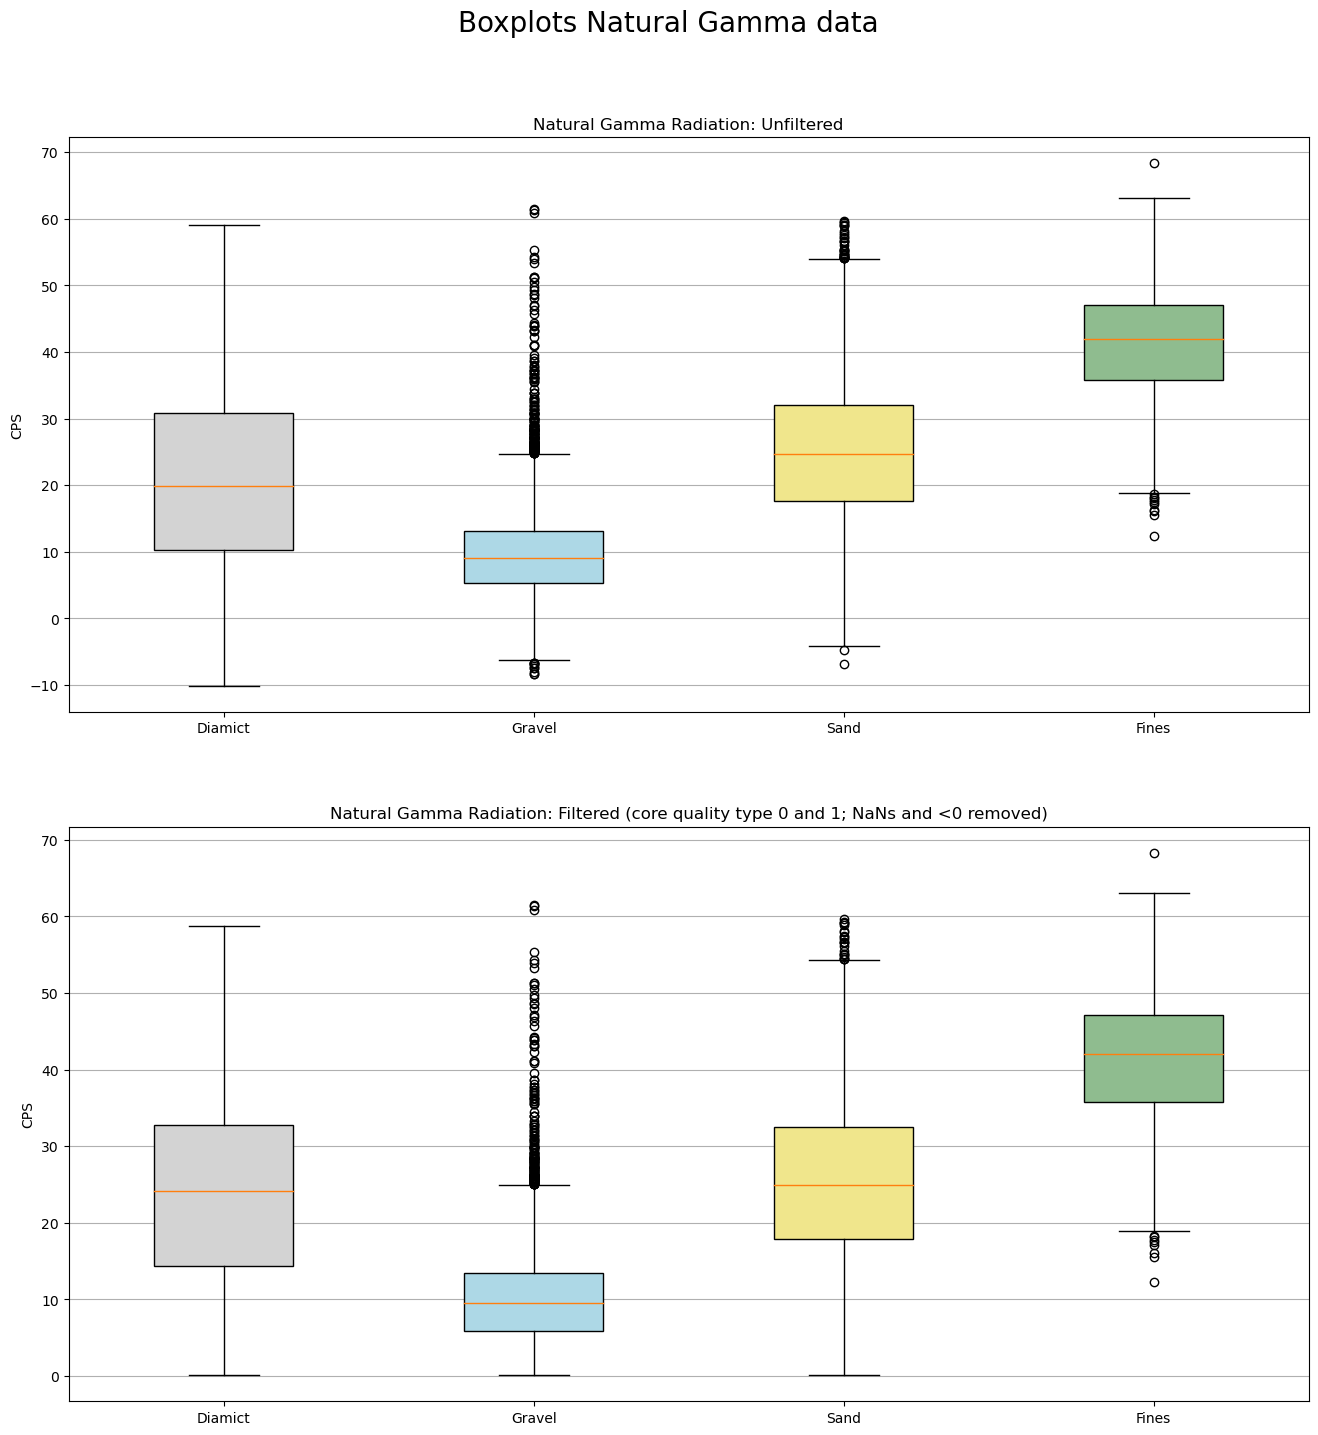

In [119]:
#removing any NaNs in the data set, otherwise no data ploted -> nan
natgamma_values_stacked_hist_uf
for i in range(len(natgamma_values_stacked_hist_uf)):#looping over the data list
    data=natgamma_values_stacked_hist_uf[i][~np.isnan(natgamma_values_stacked_hist_uf[i])]#removing NaNs by nan mask
    natgamma_values_stacked_hist_uf[i] = data#replacing the old data with the maske 


fig17, ax = plt.subplots(2,1, figsize=(16,16))
fig17.suptitle('Boxplots Natural Gamma data',fontsize=20) 
#Setting the position of the title
fig17.subplots_adjust(top=0.9)

#plots, asined as box 1/2 for chaning fill colors
box1 = ax[0].boxplot(natgamma_values_stacked_hist_uf,patch_artist=True,labels=labels)
box2 = ax[1].boxplot(natgamma_values_stacked_hist_fc,patch_artist=True,labels=labels)


#chaning fill colers
#unfiltered data
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
#filtered data      
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)

#grid
ax[0].grid( axis='y')
ax[1].grid( axis='y')

#plot title
ax[0].set_title('Natural Gamma Radiation: Unfiltered')
ax[1].set_title('Natural Gamma Radiation: Filtered (core quality type 0 and 1; NaNs and <0 removed)')

#y-axis label
ax[0].set_ylabel('CPS')
ax[1].set_ylabel('CPS')

## 3. Comparison of the datasets

### 3.1 Setting up the data

In [122]:
#Setting up the data for the scatter plots
#Filtering the dta set (filtering for values, quality clas and removing NaNs)

#excluding all rows, where density is <1.5
df_reduced_filtered_dens = df_reduced[df_reduced[header_list_df_reduced[0]]>=1.5].copy()
#excluding all rows, wherre magsus is >100
df_reduced_filtered_dens_magsus = df_reduced_filtered_dens[df_reduced_filtered_dens[header_list_df_reduced[1]]<=100].copy()
#excluding all rows, wherre natgamma is <0
df_reduced_filtered_dens_magsus_gamma = df_reduced_filtered_dens_magsus[df_reduced_filtered_dens_magsus[header_list_df_reduced[2]]>=0].copy()
#excluding all disturbed data, Quality class 2 or bigger
df_reduced_filtered_cq =  df_reduced_filtered_dens_magsus_gamma[df_reduced_filtered_dens_magsus_gamma[header_list_df_reduced[-2]]<2].copy()
#dropping all rows where there are any remaning NaNs left 
df_reduced_clean_scatter = df_reduced_filtered_cq.dropna().copy()

#creating and adding the normalised data to the original data frame, (x_norm = x-x_min/x_max-x_mib)
logs_min =pd.DataFrame(df_reduced_clean_scatter[header_list_df_reduced[0:3]].describe().loc[['min']])#minimal values
logs_max= pd.DataFrame(df_reduced_clean_scatter[header_list_df_reduced[0:3]].describe().loc[['max']])#maximal values
logs_delta = logs_max.iloc[0] - logs_min.iloc[0]#delta

#adding the normalised data as a new columne to the data frame
df_reduced_clean_scatter = df_reduced_clean_scatter.assign(dens_norm=(
    df_reduced_clean_scatter[header_list_df_reduced[0]]-logs_min.iloc[0,0])/logs_delta.iloc[0])#normalised dens
df_reduced_clean_scatter = df_reduced_clean_scatter.assign(magsus_norm=(
    df_reduced_clean_scatter[header_list_df_reduced[1]]-logs_min.iloc[0,1])/logs_delta.iloc[1])#normalised magsus
df_reduced_clean_scatter = df_reduced_clean_scatter.assign(gamma_norm=(
    df_reduced_clean_scatter[header_list_df_reduced[2]]-logs_min.iloc[0,2])/logs_delta.iloc[2])#normalised natural gamma radiation

#masking and seperating the data into the individual sub data sets, 
#extracting the statistical summary of the data for later use
#Setting upp needed input
litho_list = [1,7,11,19]#list with numerical code of main litho types (1=diamict, 7=gravel, 11=sand, 19= fines)
#prelocating the later extraced/created values
#for output of pd.describe()
summary_list = [0]*len(litho_list)#not normalised
summary_list_norm = [0]*len(litho_list)#normalised to 1
#masked data sets, sub data sets
data_log = [0]*len(litho_list)#not normalised
data_log_norm = [0]*len(litho_list)#normalised to 1

#for-loop to mask over the four main lithogroups and extract the subdata sets and the statistical summary for later use (pd.describe())
for i in range(len(litho_list)): 
    #renaming the data frame for easier handling
    all_data = df_reduced_clean_scatter
    #masking over the four main litho types, 
    all_data_f = all_data[df_reduced_clean_scatter[header_list_df_reduced[-1]] == litho_list[i]]
    
    #extracting the log data (Dens, Magsus, Natgamma)
    data = all_data_f.iloc[:,0:3]#not normalised
    data_norm = all_data_f.iloc[:,5:]#normalised 
    #adding the data to the coresponding lsit  
    data_log[i]= data#not normalised  
    data_log_norm[i] = data_norm#normalised                               
    #adding the statisitc output summary of the masked subdata set
    summary_list[i] = pd.DataFrame(data.describe()).round(2)#not normalised  
    summary_list_norm[i] = pd.DataFrame(data_norm.describe()).round(2)#normalised


if control == True:  
    #checking the impacts of the different filters
    print(f'Unfiltered: {df_reduced.info()}')
    print()

    print(f'Density filtered: {df_reduced_filtered_dens.info()}')
    print()

    print(f'magnetic susceptibility filtered: {df_reduced_filtered_dens_magsus.info()}')
    print()

    print(f'natural gamma radiation filtered: {df_reduced_filtered_dens_magsus_gamma.info()}')
    print()

    print(f'Core quality class filtered: {df_reduced_filtered_cq.info()}')
    print()

    print(f'NaN filtered: {df_reduced_filtered_cq.info()}')
    print()

    print(f'Cleaned dataset:{df_reduced_clean_scatter.info()}')
    print()

    print(f'summary list:{summary_list}')
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47591 entries, 0 to 47590
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dens [g/cc]                  46350 non-null  float64
 1   Mag_Sus BS_cor [SI x 10^-5]  46350 non-null  float64
 2   Nat_Gamma [cps]              46350 non-null  float64
 3   core_quality                 47591 non-null  int64  
 4   litho types                  47591 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.8 MB
Unfiltered: None

<class 'pandas.core.frame.DataFrame'>
Index: 45388 entries, 23 to 47587
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dens [g/cc]                  45388 non-null  float64
 1   Mag_Sus BS_cor [SI x 10^-5]  45388 non-null  float64
 2   Nat_Gamma [cps]              45388 non-null  float64
 3   core_quality       

### 3.2 Scatter plots

#### 3.2.1 Summary scatter plots

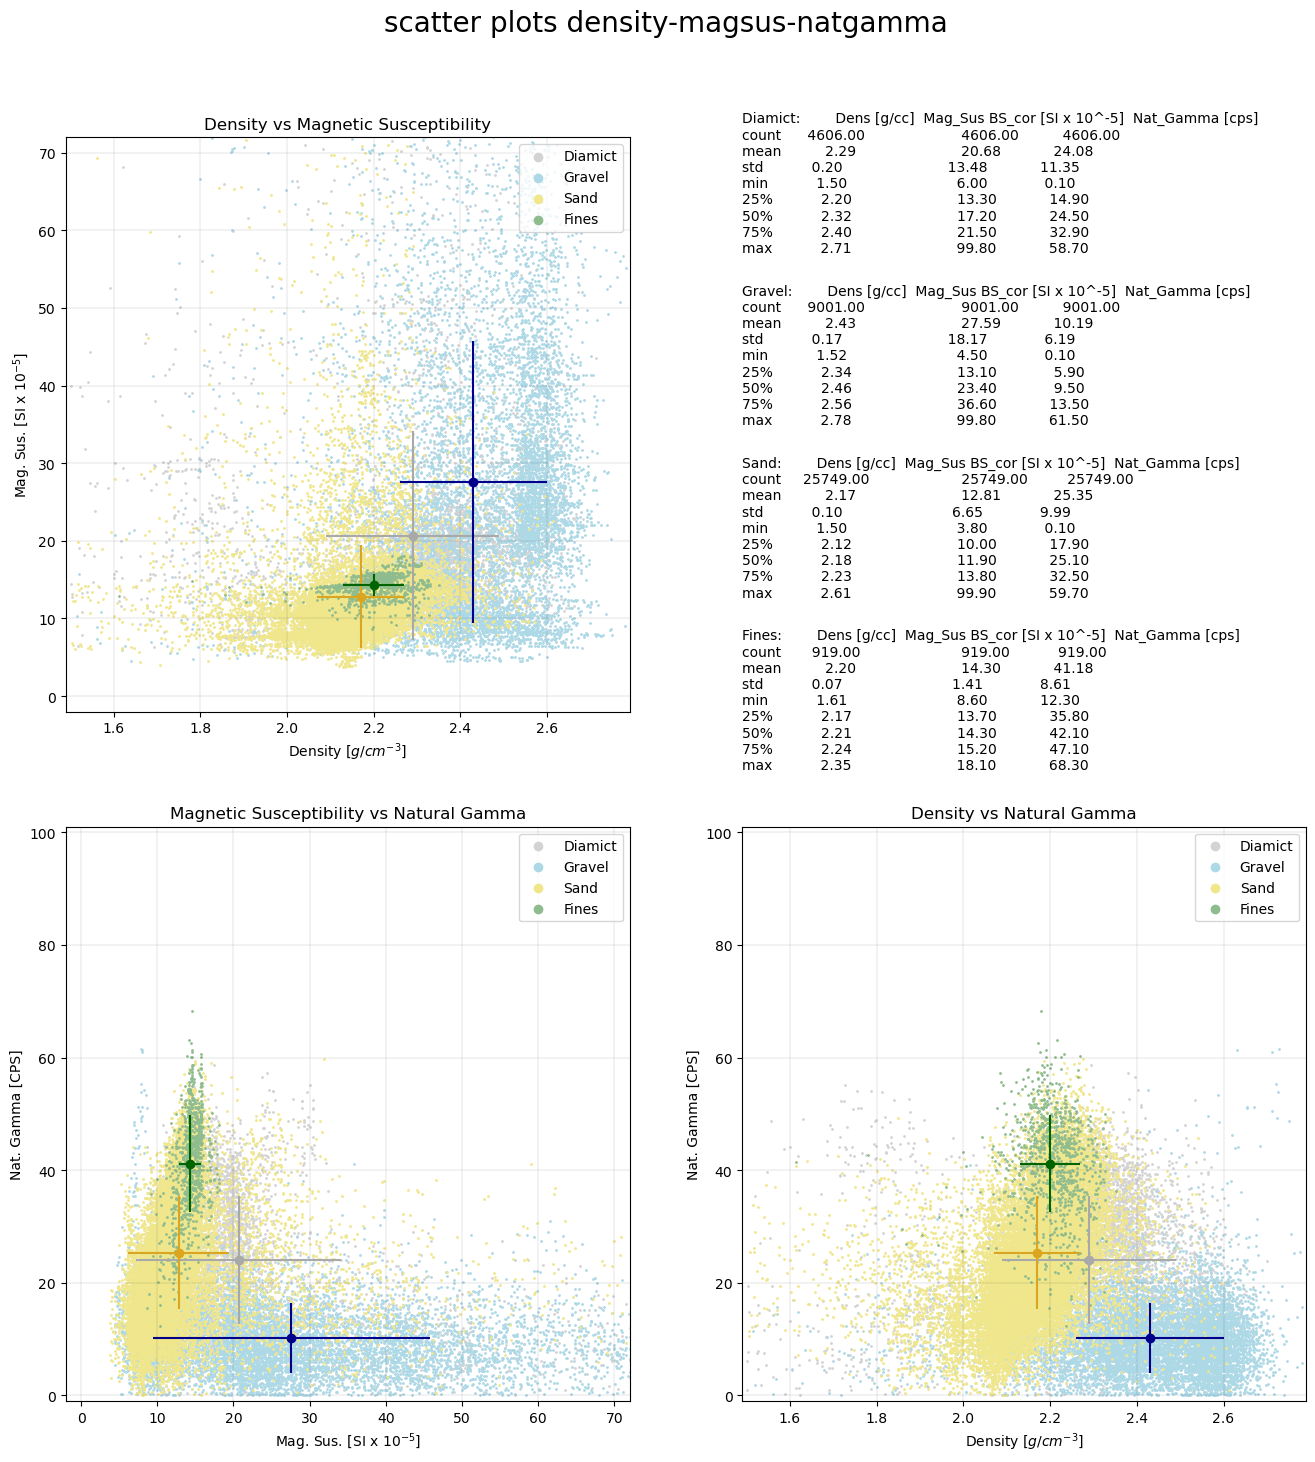

In [124]:
#setin up the needed input for the scatter ploting
colors = ['lightgray','lightblue','khaki','darkseagreen']#color list
colors_dark = ['darkgray','darkblue','goldenrod','darkgreen']#color list
labels = ['Diamict','Gravel','Sand','Fines']#list of labels for subsets of histograms
axis_labels = ['Density [$\t{g/cm}^{-3}$]','Mag. Sus. [SI x 10$^{-5}$]','Nat. Gamma [CPS]']#axis labes
title_list = ['Density vs Magnetic Susceptibility','Magnetic Susceptibility vs Natural Gamma',
              'Density vs Natural Gamma']#title 
axis_limits = [[1.49,2.79],[-2, 72],[-1, 101]]#axis limnits

index1 = [0,1,0]#indices of used X data/axis 
index2 = [1,2,2]#indices of used y data/axis

#scatterplot cobined in three panels, plots all four litho groups in one pannel
#Setting up the supplots
fig18, ax = plt.subplots(2,2, figsize=(16,16))
fig18.suptitle('scatter plots density-magsus-natgamma',fontsize=20) 
#Setting the position of the title
fig18.subplots_adjust(top=0.9)

#for-loop to plot the combined scatterplots of of the four main litho groups 
#plot 1 (0/0):Density vs Magnetic Susceptibility
#plot 2 (1/0):Magnetic Susceptibility vs Natural Gamma
#plot 3 (1/1):Density vs Natural Gamma

c = 0#sets start value of counter to 0
for i in range(2):#looping over the colums
    for j in range(2):#looping over the rows
        if (i == 0) and (j==1):#condition to hide plot at position 0/1, 
            ax[i][j].axis('off')
            for x in range(len(colors)):#plots the statistical summary of the 4 subdata sets at the position 0/1
                ax[i][j].text(0,(0.8-0.3*x),f'{labels[x]}: {summary_list[x]}',fontsize=10)
            c=c-1#reduced the counter by 1 to corect the needed value for the other plots
        else: 
            #plot comand loops over the four main litho groups
            for x in range(len(colors)):
                #scatter plot of whole subdata set
                ax[i][j].scatter(data_log[x].iloc[:,index1[c]],data_log[x].iloc[:,index2[c]],c=colors[x],s = 1,
                                 label=labels[x]) 
                #plots the mean value with the standard deviation
                ax[i][j].errorbar(summary_list[x].iloc[1,index1[c]],summary_list[x].iloc[1,index2[c]],
                                  xerr=summary_list[x].iloc[2,index1[c]],yerr= summary_list[x].iloc[2,index2[c]],
                                  fmt='o', c=colors_dark[x])
                #plot Settings
                ax[i][j].set_title(title_list[c])#title
                ax[i][j].set_ylabel(axis_labels[index2[c]])#y-axis label
                ax[i][j].set_xlabel(axis_labels[index1[c]])#x-axis label
                ax[i][j].set_ylim(axis_limits[index2[c]])#y-axis limits
                ax[i][j].set_xlim(axis_limits[index1[c]])#x-axis limits
                ax[i][j].legend(markerscale=6,loc="upper right")#legend
                ax[i][j].grid(color='k', linestyle='--', linewidth=0.1)#grid                               
        c = c+1#updating the counter if plot was completeed
                

#### 3.2.2 Individual scatter plots

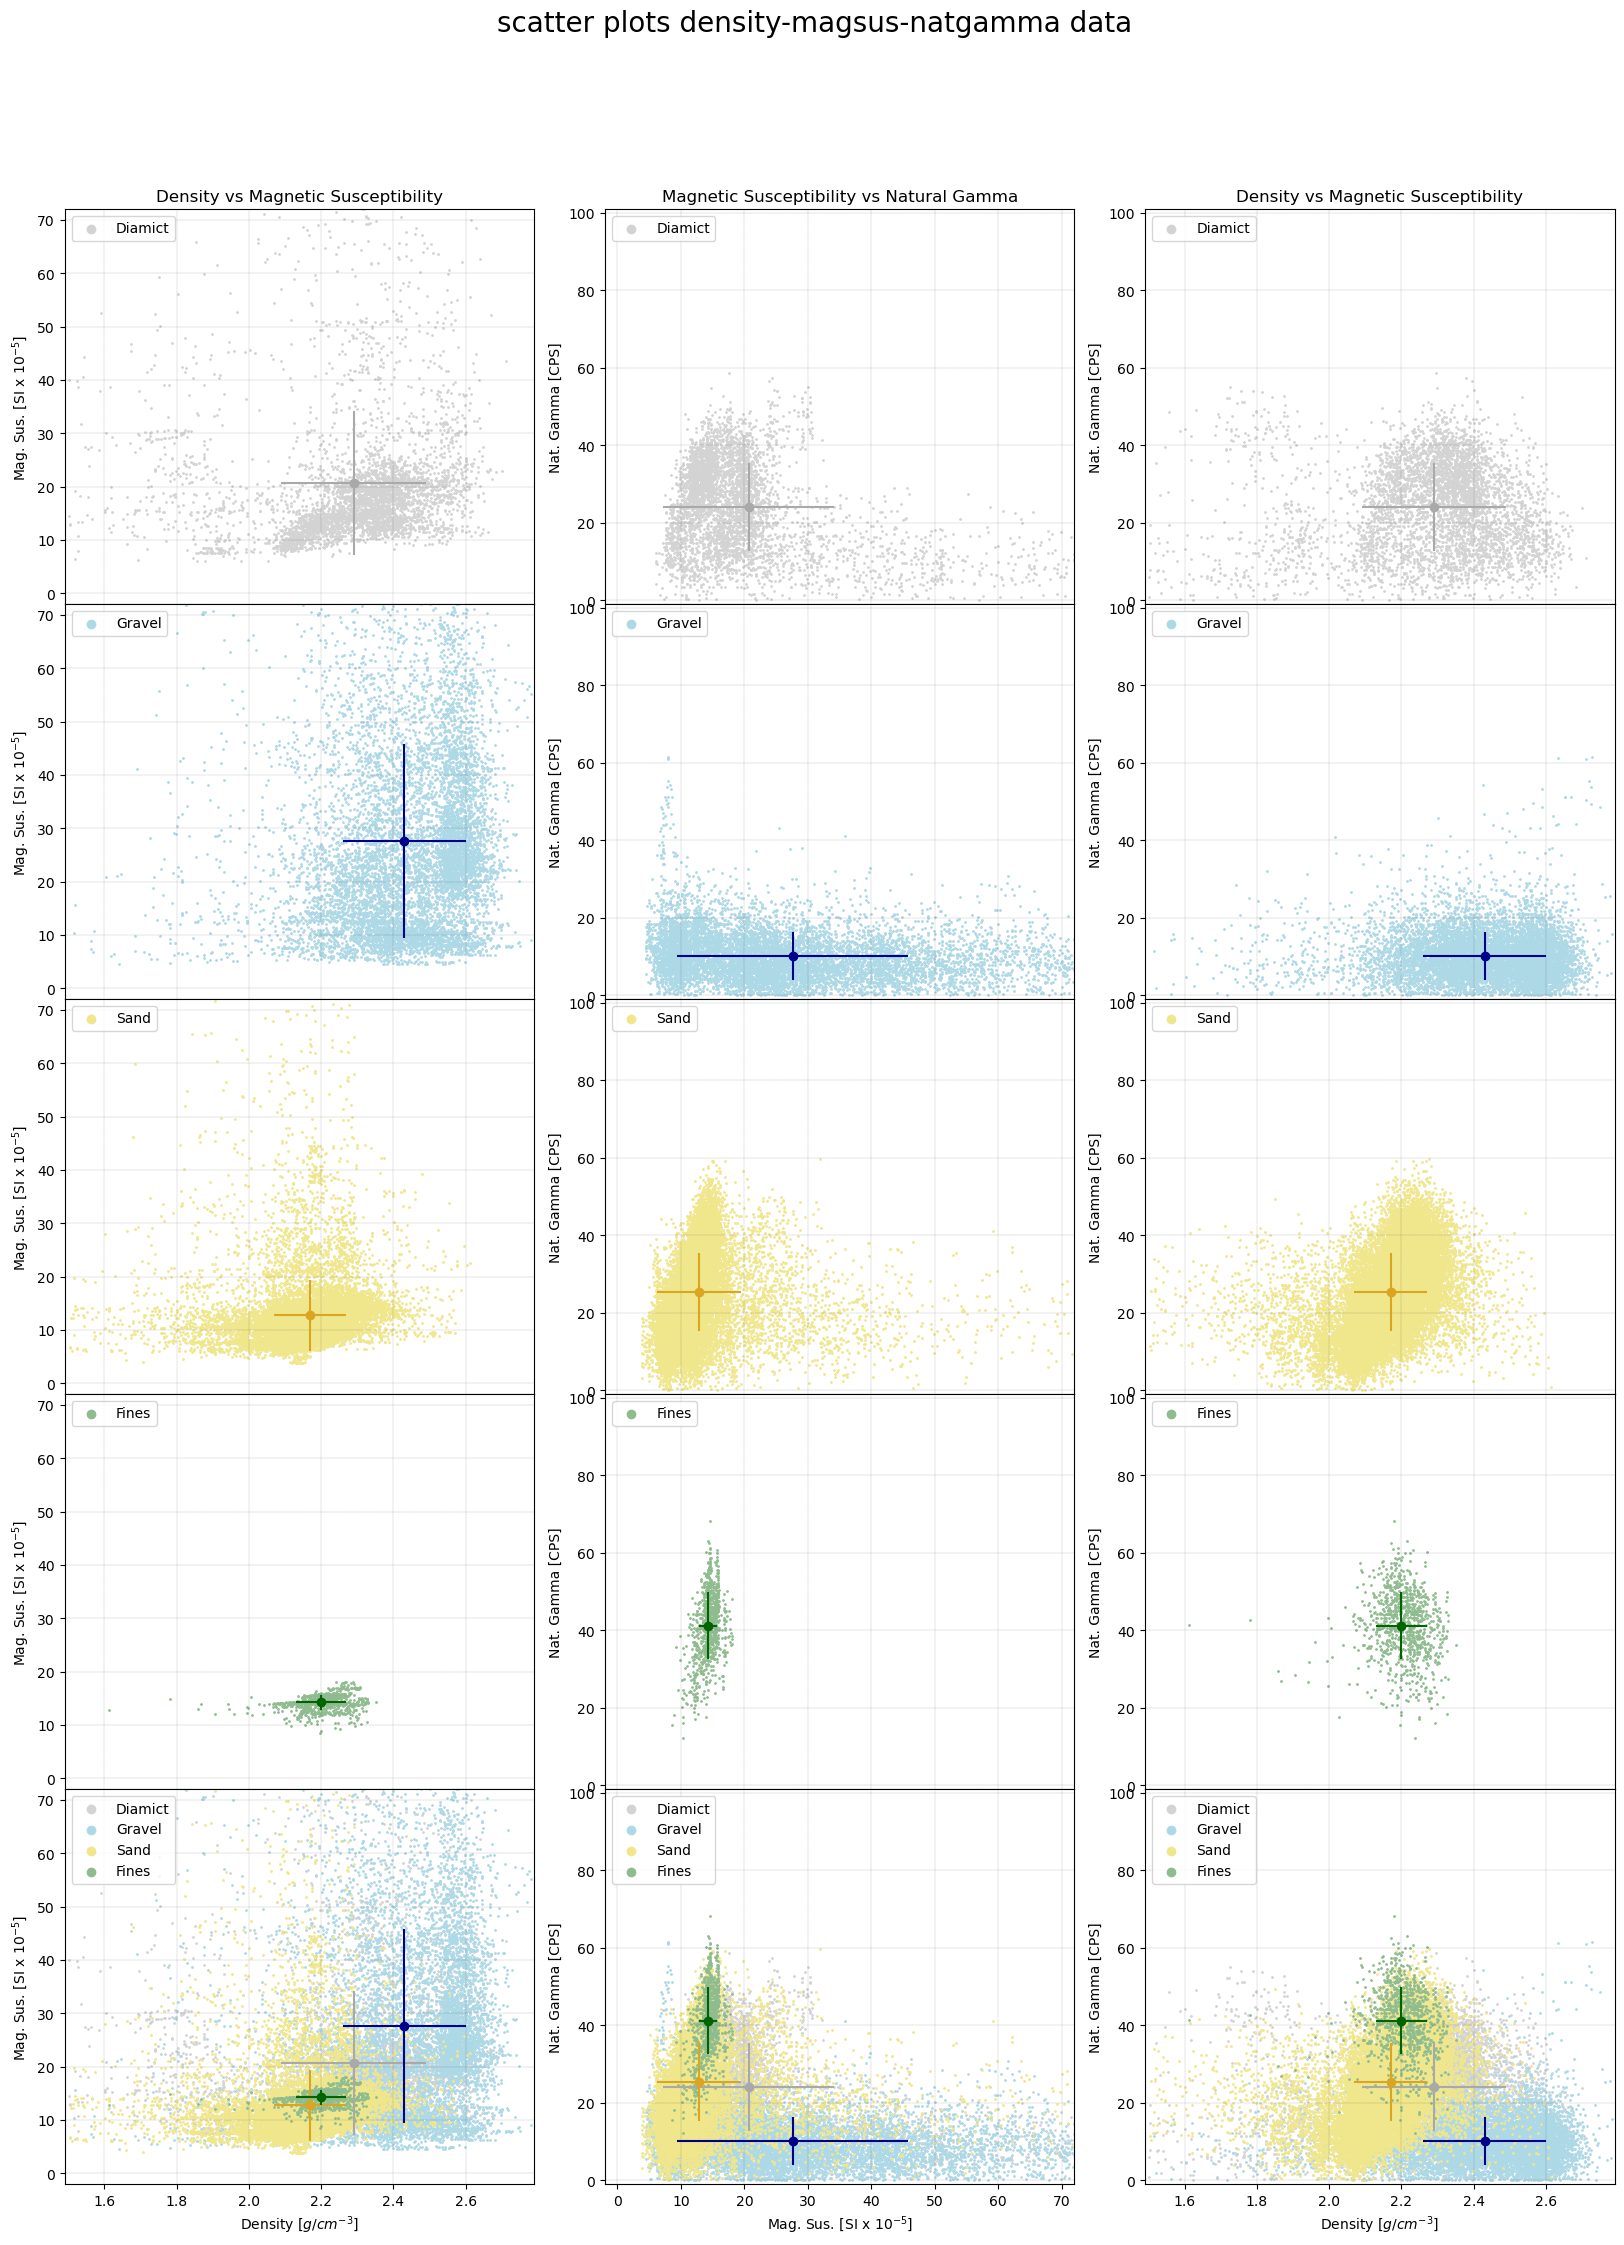

In [125]:
#plot of the individual components of the of the three logs and a summary plot in the last row
#Setting up the supplots
fig19, ax = plt.subplots(5,3, figsize=(20,25),sharex='col')
fig19.suptitle('scatter plots density-magsus-natgamma data',fontsize=20) 
#Setting the position of the title
fig19.subplots_adjust(top=0.9,wspace=0.15, hspace=0)

#for loop to plot the scatter plots of each subdata set.
#rows: 1 = diamict; 2 = gravel; 3 = sand; 4 = fines; 5 = combined
#columns: 1: Dens/Magsus; 2: Magsus/Natgamma; 3: dens/natgamma

for i in range(len(index1)):#looping over the columns 
        for j in range(len(colors)+1):#looping over the rows
       
            if j == 0:#sets tital and x-axis limits for sheard x axis of plots in the first row
                ax[j][i].set_title(title_list[index1[i]])#title
                ax[j][i].set_xlim(axis_limits[index1[i]])#x-axis limit 

            #last row of plots, summary plot
            #if j == indices of last row
            if j == len(colors): 
                #summary plot of all four litho groups (lopus over all four sub data set)
                for x in range(len(colors)):
                    #scatterplots
                    ax[j][i].scatter(data_log[x].iloc[:,index1[i]],data_log[x].iloc[:,index2[i]],c=colors[x],
                                     s=1,label=labels[x])
                    #plots the mean with std range of each litho group
                    ax[j][i].errorbar(summary_list[x].iloc[1,index1[i]],
                                      summary_list[x].iloc[1,index2[i]], xerr=summary_list[x].iloc[2,index1[i]],
                                      yerr= summary_list[x].iloc[2,index2[i]], fmt='o', c=colors_dark[x])                
                    ax[j][i].set_xlabel(axis_labels[index1[i]])#x axis label                

            else:#if plot is not in the last row, induvidal plots of each litho group 
                #scatter plot
                ax[j][i].scatter(data_log[j].iloc[:,index1[i]],data_log[j].iloc[:,index2[i]],c=colors[j],s = 1,label=labels[j])
                #plots the mean with std range of each sub data set
                ax[j][i].errorbar(summary_list[j].iloc[1,index1[i]],summary_list[j].iloc[1,index2[i]],
                                  xerr=summary_list[j].iloc[2,index1[i]],yerr= summary_list[j].iloc[2,index2[i]],
                                  fmt='o', c=colors_dark[j])
            
            #for all plots
            ax[j][i].set_ylabel(axis_labels[index2[i]])#y axis label
            ax[j][i].set_ylim(axis_limits[index2[i]])#y axis limits
            ax[j][i].legend(markerscale=6,loc="upper left")#plots legend
            ax[j][i].grid(color='k', linestyle='--', linewidth=0.1)#grid        

### 3.3 Ternary scatter plots

#### 3.3.1 Sumary scatter plots

Text(0.5, 1.1, 'Normalised ternary scatter plot density-magsus-natgamma')

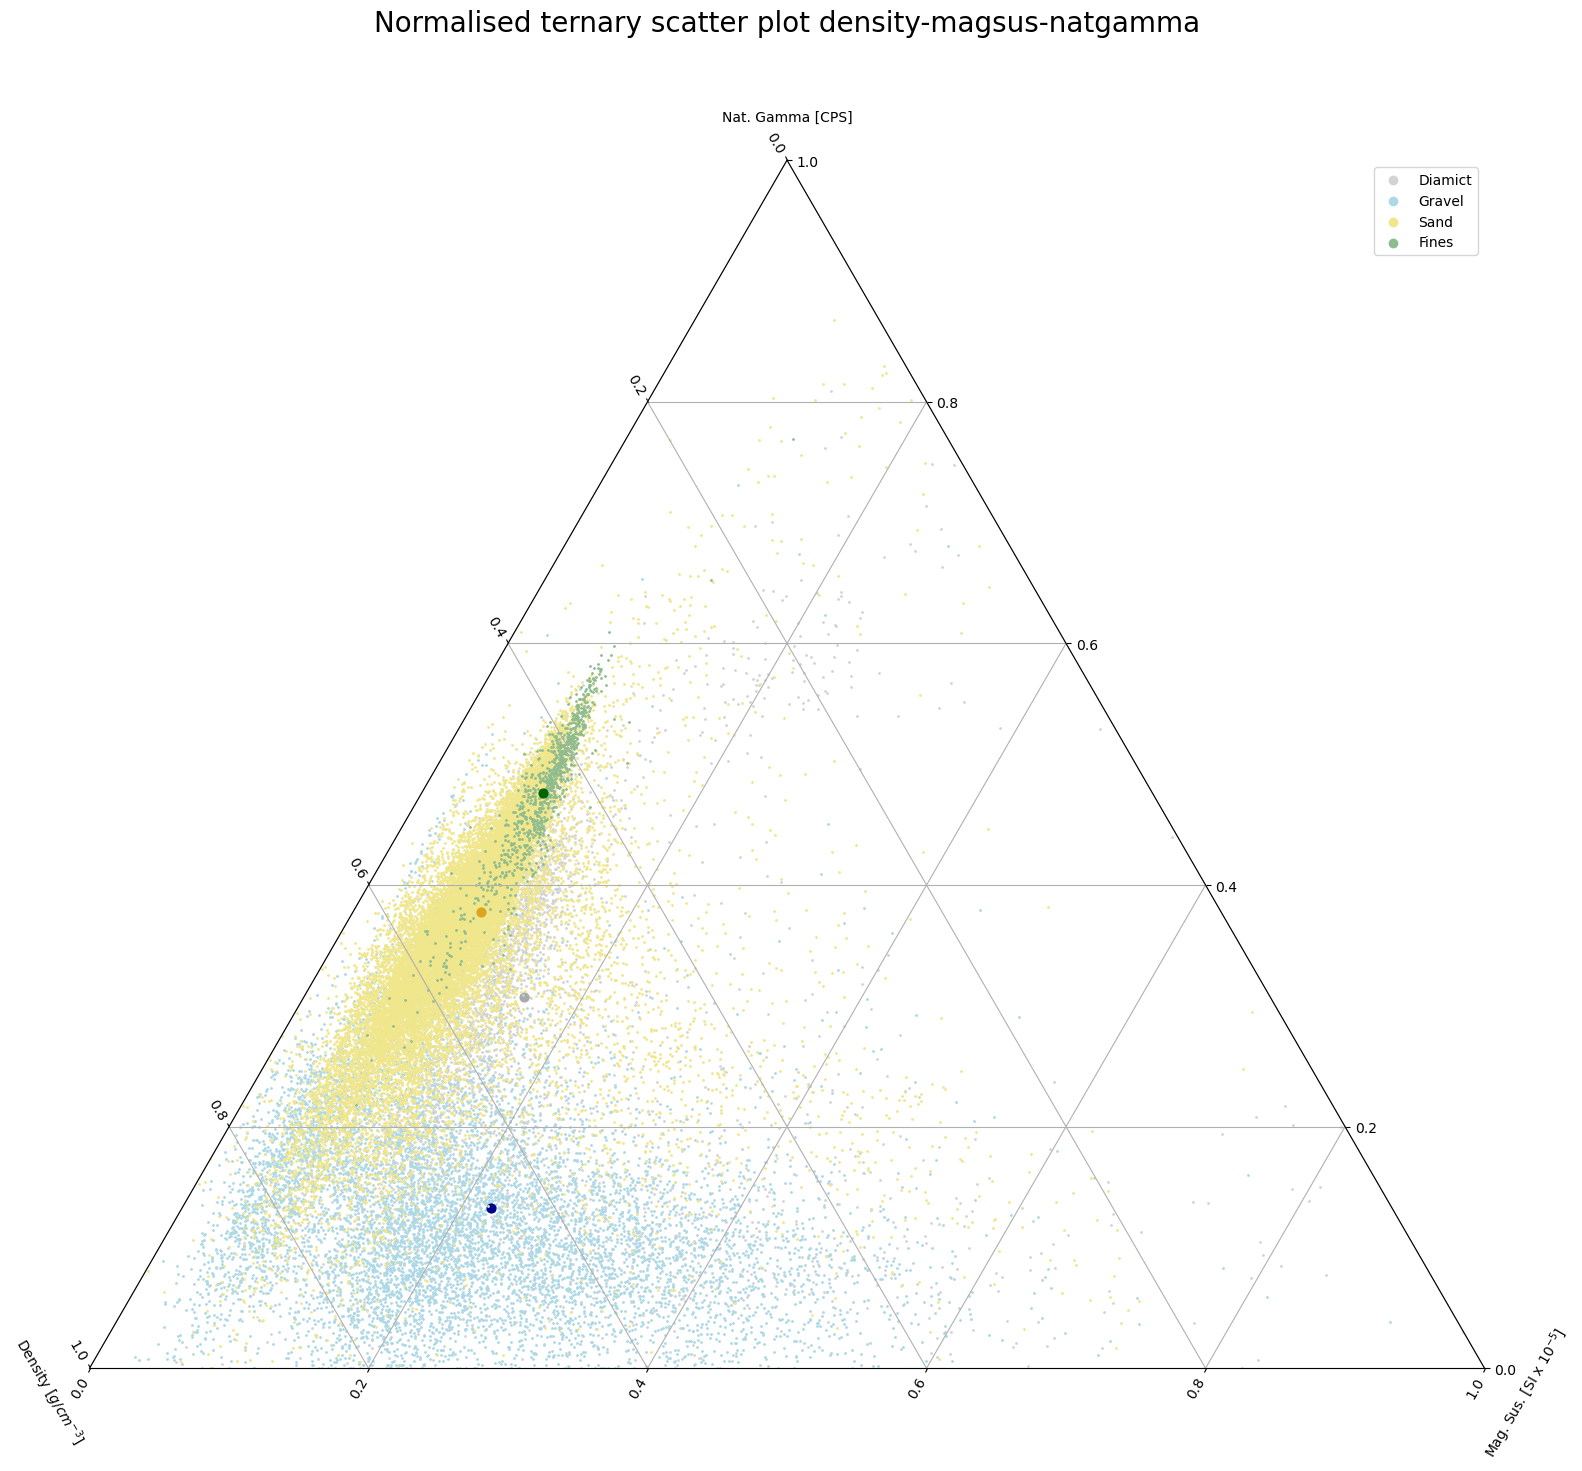

In [127]:
#creating a normalised ternary plot of the density, magsus, and natgamma data
fig20 = plt.figure(figsize=(18, 18))#Setting up the plot

ax1= fig20.add_subplot(1, 1, 1, projection="ternary")#adding a figure/axis to the subplot
#ploting the four supdata sets
for i in range(len(colors)):#loops over the four litho groups
    #scatterplot of all data
    ax1.scatter(data_log_norm[i].iloc[:,2],data_log_norm[i].iloc[:,0],data_log_norm[i].iloc[:,1],
                c=colors[i],s = 1,label=labels[i])
    #scatterplot of mean
    ax1.scatter(summary_list_norm[i].iloc[1,2],summary_list_norm[i].iloc[1,0],summary_list_norm[i].iloc[1,1]
                ,s = 40,c=colors_dark[i])
#other Settings
ax1.grid()#grid
ax1.legend(markerscale=6)#legend
#axis labels
ax1.set_tlabel(axis_labels[2])
ax1.set_llabel(axis_labels[0])
ax1.set_rlabel(axis_labels[1])
#title
ax1.set_title('Normalised ternary scatter plot density-magsus-natgamma',fontsize=20, x = 0.5, y = 1.1)


#### 3.3.2 individual scatter plots

In [130]:
#creating 4 individual normalised ternary plots (Density, Magsus, and Natgamma) of the four main lihto types
fig21 = plt.figure(figsize=(18, 18))#Setting up the figur
fig21.subplots_adjust(left=0.075, right=0.85, wspace=0.3)#adjusting the the position of the individual plots
fig21.suptitle('Normalised ternary scatter plot density-magsus-natgamma',fontsize=20)#Setting the plot title


#looping over the data to plot the individual data sets
for i in range(len(colors)):
    ax= fig20.add_subplot(2, 2, i+1, projection="ternary")#adding a supplot
    ax.scatter(data_log_norm[i].iloc[:,2],data_log_norm[i].iloc[:,0],data_log_norm[i].iloc[:,1],c=colors[i],
               s = 1,label=labels[i])
    #meaqn
    ax.scatter(summary_list_norm[i].iloc[1,2],summary_list_norm[i].iloc[1,0],
                   summary_list_norm[i].iloc[1,1],s = 40,c=colors_dark[i])
    
    #adding a line going throug the mean in respect to each axis
    #ax.axtline(summary_list_norm[i].iloc[1,2]/sum(summary_list_norm[i].iloc[1]),ls = '-',c=colors_dark[i])
    #ax.axlline(summary_list_norm[i].iloc[1,0]/sum(summary_list_norm[i].iloc[1]),ls = '-',c=colors_dark[i])
    #ax.axrline(summary_list_norm[i].iloc[1,1]/sum(summary_list_norm[i].iloc[1]),ls = '-',c=colors_dark[i])
    #adding a line going throug the mean-std in respect to each axis
    #ax.axtline(np.add(summary_list_norm[i].iloc[1,2],summary_list_norm[i].iloc[2,2])/sum(summary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    #ax.axlline(np.add(summary_list_norm[i].iloc[1,0],summary_list_norm[i].iloc[2,0])/sum(summary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    #ax.axrline(np.add(summary_list_norm[i].iloc[1,1],summary_list_norm[i].iloc[2,1])/sum(summary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    #adding a line going throug the mean-std in respect to each axis
    #ax.axtline(np.subtract(summary_list_norm[i].iloc[1,2],summary_list_norm[i].iloc[2,2])/sum(summary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    #ax.axlline(np.subtract(summary_list_norm[i].iloc[1,0],summary_list_norm[i].iloc[2,0])/sum(summary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    #ax.axrline(np.subtract(summary_list_norm[i].iloc[1,1],summary_list_norm[i].iloc[2,1])/sum(summary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    
    #general plotings
    ax.grid()#grid
    #axis labels
    ax.set_tlabel(axis_labels[2])
    ax.set_llabel(axis_labels[0])
    ax.set_rlabel(axis_labels[1])
    #title
    ax.set_title(labels[i])
    


<Figure size 1800x1800 with 0 Axes>